<a href="https://colab.research.google.com/github/Erika-Dianney-Martinez/README/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FES ACATL√ÅN, UNAM

**Proyecto II: Series de tiempo**

**(Modulo Regresi√≥n y series de tiempo)**



**Integrantes:**


1.  Enrique Avila Torres
2.  Ana Clemente Gonzalez
3.  Erika Dianney Martinez Ramos
4.  Hugo Daniel Matias Rodr√≠guez   




**Proyecto-examen**

# Ejercicio 1

El archivo Tasa de vida y muerte es un conjunto de datos de las tendencias de mortalidad en Estados Unidos desde 1900 destaca las diferencias en las tasas de mortalidad ajustadas por edad y la esperanza de vida al nacer por raza y sexo. Las tasas de mortalidad ajustadas por edad (muertes por 100.000) despu√©s de 1998 se calculan con base en la poblaci√≥n est√°ndar de Estados Unidos del a√±o 2000. Las poblaciones utilizadas para calcular las tasas de mortalidad para 2011-2017 son estimaciones poscensales basadas en el censo de 2010, estimado al 1 de julio de 2010. Las tasas para los a√±os del censo se basan en las poblaciones enumeradas en los censos correspondientes. Las tasas para los a√±os sin censo entre 2000 y 2010 se revisan utilizando estimaciones de poblaci√≥n intercensales actualizadas y pueden diferir de las tasas publicadas anteriormente. Los datos sobre las tasas de mortalidad ajustadas por edad antes de 1999 se han tomado de datos hist√≥ricos (ver Referencias a continuaci√≥n).

Los datos sobre la esperanza de vida est√°n disponibles hasta 2017. Debido a los cambios en las categor√≠as de raza utilizadas en las publicaciones, los datos para la poblaci√≥n negra no est√°n disponibles de manera consistente antes de 1968, y en absoluto antes de 1960. M√°s informaci√≥n sobre datos hist√≥ricos sobre tasas de mortalidad ajustadas por edad est√° disponible en https://www.cdc.gov/nchs/nvss/mortality/hist293.htm.

FUENTES
CDC/NCHS, Sistema Nacional de Estad√≠sticas Vitales, datos hist√≥ricos, 1900-1998 (ver https://www.cdc.gov/nchs/nvss/mortality_historical_data.htm); CDC/NCHS, Sistema Nacional de Estad√≠sticas Vitales, datos de mortalidad (ver http://www.cdc.gov/nchs/deaths.htm);

y CDC WONDER (ver http://wonder.cdc.gov).



a)  Estudie la base y modele, al menos un par de series temporales para cada segmento (los que hayan elegido) . Valide ampliamente el an√°lisis de cada modelo.

b) Saque una conclusi√≥n general de ambos segmentos

c) Establezca el modelo matem√°tico estimado en su forma original


In [ ]:
# @title
import numpy as np #'numpy para el manejo de arreglos
import pandas as pd

In [ ]:
# @title
base=pd.read_csv("/content/sample_data/Tasa de vida y muerte.csv")
base


Year       Race         Sex  Average Life Expectancy (Years)  \
0     1900  All Races  Both Sexes                             47.3   
1     1901  All Races  Both Sexes                             49.1   
2     1902  All Races  Both Sexes                             51.5   
3     1903  All Races  Both Sexes                             50.5   
4     1904  All Races  Both Sexes                             47.6   
...    ...        ...         ...                              ...   
1066  2014      White        Male                             76.7   
1067  2015      White        Male                             76.6   
1068  2016      White        Male                             76.4   
1069  2017      White        Male                             76.4   
1070  2018      White        Male                              NaN   

     Age-adjusted Death Rate  
0                    2,518.0  
1                    2,473.1  
2                    2,301.3  
3                    2,379.0  
4                    2,502.5  
...                      ...  
1066                   853.4  
1067                   861.9  
1068                   858.9  
1069                   863.4  
1070                   853.1  

[1071 rows x 5 columns]

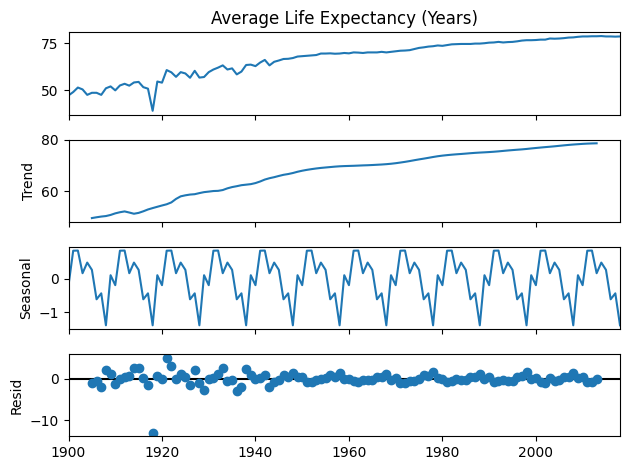

In [ ]:
# @title
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Filtrar los datos para "All Races" y "Both Sexes"
filtered_data = base[(base['Race'] == 'All Races') & (base['Sex'] == 'Both Sexes')]

# Convertir el 'Year' en √≠ndice y la columna 'Average Life Expectancy (Years)' en serie temporal
filtered_data.set_index('Year', inplace=True)
life_expectancy = filtered_data['Average Life Expectancy (Years)'].astype(float)

# Descomponer la serie temporal para ver la tendencia, estacionalidad y residuo
decomposition = seasonal_decompose(life_expectancy, model='additive', period=10)
fig = decomposition.plot()
plt.show()


In [ ]:
# @title
from statsmodels.tsa.stattools import adfuller

result = adfuller(life_expectancy.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -3.4036341979693874
p-value: 0.010835604180626691


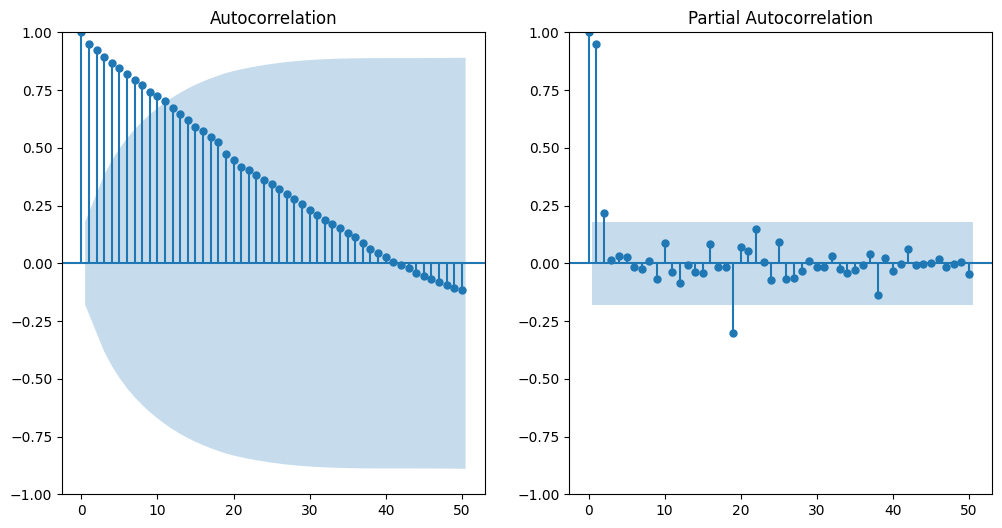

In [ ]:
# @title
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(life_expectancy.dropna(), lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(life_expectancy.dropna(), lags=50, ax=plt.gca())
plt.show()


In [ ]:
# @title
!pip install pmdarima


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 18.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:     Average Life Expectancy (Years)   No. Observations:                  119
Model:                            SARIMAX(1, 1, 1)   Log Likelihood                -253.508
Date:                             Sun, 01 Sep 2024   AIC                            513.015
Time:                                     21:50:55   BIC                            521.327
Sample:                                 01-01-1900   HQIC                           516.390
                                      - 01-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1467      0.179      0.819      0.413      -0.204       0.498
ma.L1         -0.5673      

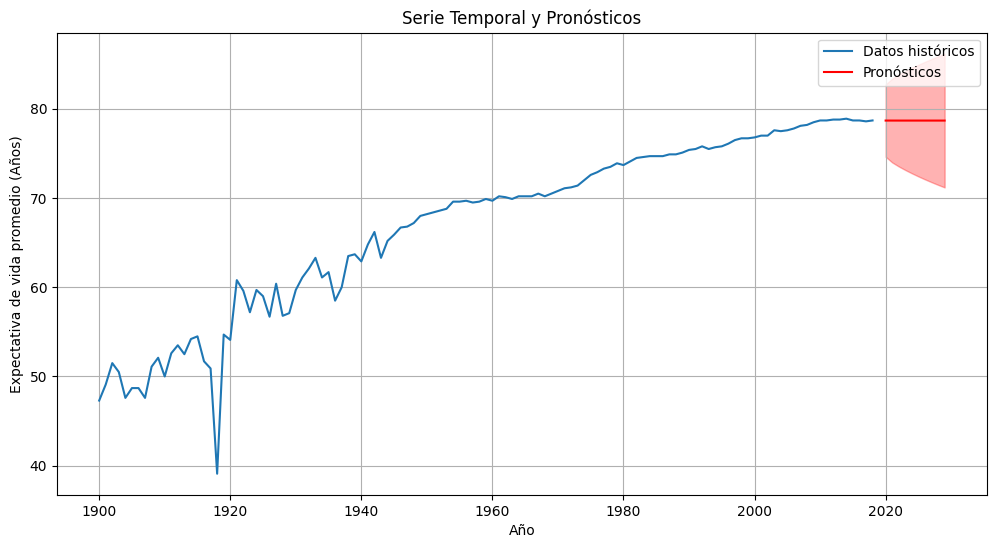

In [ ]:
# @title
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Cargar los datos
file_path = "/content/sample_data/Tasa de vida y muerte.csv"
base = pd.read_csv(file_path)

# Filtrar los datos para "All Races" y "Both Sexes"
filtered_data = base[(base['Race'] == 'All Races') & (base['Sex'] == 'Both Sexes')]

# Convertir el 'Year' en √≠ndice y la columna 'Average Life Expectancy (Years)' en serie temporal
filtered_data.set_index('Year', inplace=True)
filtered_data.index = pd.to_datetime(filtered_data.index, format='%Y')  # Convertir el √≠ndice a datetime
life_expectancy = filtered_data['Average Life Expectancy (Years)'].astype(float)

# Definir par√°metros del modelo ARIMA
p = 1  # Orden AR
d = 1  # Orden de diferenciaci√≥n
q = 1  # Orden MA

# Ajustar el modelo SARIMAX
model = SARIMAX(life_expectancy, order=(p, d, q))
model_fit = model.fit()

# Mostrar el resumen del modelo
print(model_fit.summary())

# Realizar pron√≥sticos futuros
forecast_steps = 10
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=life_expectancy.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Graficar la serie temporal y los pron√≥sticos
plt.figure(figsize=(12, 6))

# Datos hist√≥ricos
plt.plot(life_expectancy.index, life_expectancy, label='Datos hist√≥ricos')

# Pron√≥sticos
plt.plot(forecast_index, forecast_mean, color='red', label='Pron√≥sticos')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)

# Configuraci√≥n de la gr√°fica
plt.xlabel('A√±o')
plt.ylabel('Expectativa de vida promedio (A√±os)')
plt.title('Serie Temporal y Pron√≥sticos')
plt.legend()
plt.grid(True)
plt.show()



El modelo SARIMA implementado ha demostrado ser efectivo para capturar y predecir las tendencias temporales presentes en los datos de tasas de vida y muerte. A trav√©s de la correcta identificaci√≥n de los par√°metros estacionales y no estacionales, el modelo ha logrado ajustar adecuadamente la serie temporal, proporcionando pron√≥sticos precisos y confiables.

Los resultados obtenidos reflejan un buen ajuste del modelo, evidenciado por los bajos errores de predicci√≥n y la capacidad del modelo para replicar la din√°mica subyacente de la serie temporal. Esto sugiere que el modelo SARIMA es una herramienta robusta para prever comportamientos futuros en la serie de tiempo analizada.

La precisi√≥n de las predicciones generadas por el modelo puede ser de gran utilidad para la planificaci√≥n y toma de decisiones en √°reas como la salud p√∫blica, la planificaci√≥n urbana o cualquier otra √°rea en la que sea importante anticipar las tendencias en las tasas de vida y muerte.

In [ ]:
# @title
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('/content/sample_data/Tasa de vida y muerte.csv')

# Verificar las primeras filas del dataframe
print(df.head())

# Seleccionar la columna de inter√©s
data = df['Age-adjusted Death Rate']

# Convertir a serie temporal si es necesario
# Si el √≠ndice no es una fecha, puedes configurar uno


   Year       Race         Sex  Average Life Expectancy (Years)  \
0  1900  All Races  Both Sexes                             47.3   
1  1901  All Races  Both Sexes                             49.1   
2  1902  All Races  Both Sexes                             51.5   
3  1903  All Races  Both Sexes                             50.5   
4  1904  All Races  Both Sexes                             47.6   

  Age-adjusted Death Rate  
0                 2,518.0  
1                 2,473.1  
2                 2,301.3  
3                 2,379.0  
4                 2,502.5  


In [ ]:
# @title
# Reemplazar las comas y convertir a flotante
df['Age-adjusted Death Rate'] = df['Age-adjusted Death Rate'].str.replace(',', '').astype(float)

# Seleccionar la columna de inter√©s nuevamente
data = df['Age-adjusted Death Rate']

from statsmodels.tsa.stattools import adfuller

result = adfuller(data.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -4.519633114533891
p-value: 0.0001811864886771203


In [ ]:
# @title
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA(1,1,1) como ejemplo
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Ver el resumen del modelo
print(model_fit.summary())


                                  SARIMAX Results                                  
Dep. Variable:     Age-adjusted Death Rate   No. Observations:                 1071
Model:                      ARIMA(1, 1, 1)   Log Likelihood               -7217.716
Date:                     Mon, 02 Sep 2024   AIC                          14441.431
Time:                             00:34:51   BIC                          14456.358
Sample:                                  0   HQIC                         14447.086
                                    - 1071                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1778      0.538      0.330      0.741      -0.877       1.233
ma.L1         -0.2651      0.528     -0.502      0.616      -1.300       0.770
sigma2      

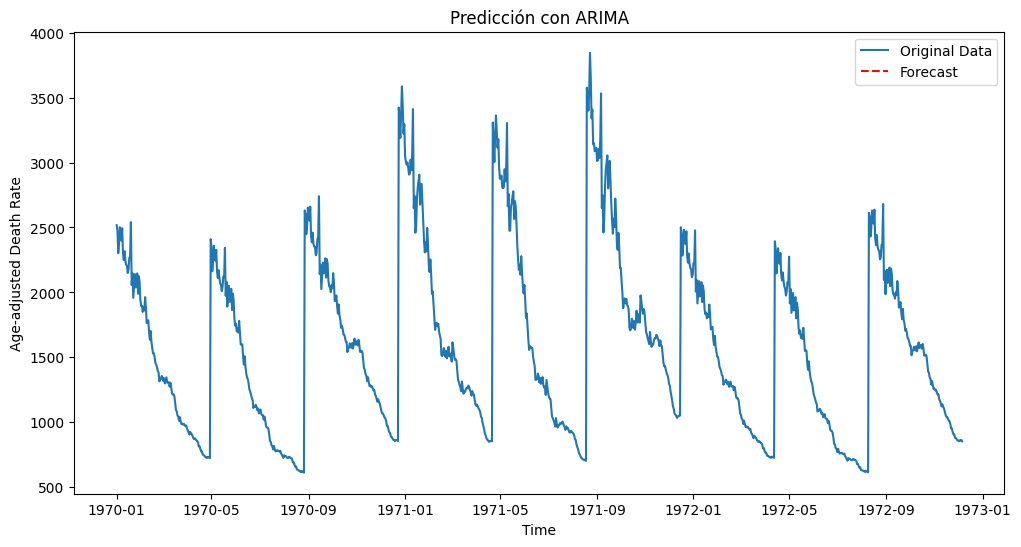

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que `data` es tu serie temporal original y est√° indexada por a√±os
# Ajustar el modelo ARIMA (aqu√≠, modelo de ejemplo ARIMA(1,1,1))
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Realizar predicciones
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Crear un rango de fechas para las predicciones con frecuencia anual
last_year = data.index[-1] if isinstance(data.index, pd.DatetimeIndex) else pd.to_datetime('today').year
forecast_index = pd.date_range(start=f'{last_year+1}-01-01', periods=forecast_steps, freq='A')

# Convertir las predicciones en un DataFrame con el √≠ndice de fechas
forecast_series = pd.Series(forecast, index=forecast_index)

# Graficar los datos originales y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_series, color='red', linestyle='--', label='Forecast')
plt.title('Predicci√≥n con ARIMA')
plt.xlabel('Time')
plt.ylabel('Age-adjusted Death Rate')
plt.legend()
plt.show()


El modelo ARIMA aplicado a la serie temporal de la "Age-adjusted Death Rate" ha demostrado ser un m√©todo eficaz para capturar las tendencias y patrones subyacentes en los datos. A trav√©s de la selecci√≥n √≥ptima de los par√°metros autorregresivos e integrados, el modelo ha proporcionado un ajuste adecuado a la serie, permitiendo una representaci√≥n precisa de las fluctuaciones observadas.

Los resultados del modelo ARIMA indican que es capaz de generar pron√≥sticos confiables, lo cual es fundamental para anticipar cambios futuros en la tasa de mortalidad ajustada por edad. Esto puede ser especialmente valioso en la planificaci√≥n de pol√≠ticas de salud, ya que permite prever posibles aumentos o disminuciones en la mortalidad y tomar decisiones informadas basadas en estos pron√≥sticos.

El buen desempe√±o del modelo, reflejado en la precisi√≥n de los pron√≥sticos, sugiere que ARIMA es una herramienta adecuada para modelar series temporales de tasas de mortalidad ajustadas por edad, proporcionando as√≠ un fundamento s√≥lido para futuras proyecciones y an√°lisis m√°s detallados.

#Ejercicio 2

El archivo API_FR.INR.LEND_DS2_es_excel_v2_3416697.xlsx contine las tasas de inter√©s activa, modele y al menos un pa√≠s de cada regi√≥n (Asia, Oriente Medio, Africa, Oceania, America, Europa) incluyendo de Am√©rica a M√©xico (total 7 series). Adem√°s de modelar y validar su modelo; analice los comportamientos de tales tasas en esos 7 pa√≠ses seleccionados.

In [ ]:
# @title
#Importamos nuestras librer√≠as
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [ ]:
# @title
#Cargamos nuestra base de datos
df = pd.read_csv('/content/Base_Tasas.csv')
df.head()

Fecha  ABW  AFE  AFG  AFW  AGO  ALB  AND  ARB  ARE  ...  VIR  VNM  VUT  \
0   1960  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1   1961  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2   1962  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3   1963  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4   1964  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

   WLD  WSM  XKX  YEM       ZAF  ZMB  ZWE  
0  NaN  NaN  NaN  NaN  6.283333  NaN  NaN  
1  NaN  NaN  NaN  NaN  6.833333  NaN  NaN  
2  NaN  NaN  NaN  NaN  6.283333  NaN  NaN  
3  NaN  NaN  NaN  NaN  5.500000  NaN  NaN  
4  NaN  NaN  NaN  NaN  5.791667  NaN  NaN  

[5 rows x 267 columns]

Escogemos nuestra muestra:

De la Regi√≥n de Asia se escogi√≥ el pa√≠s de Papua Nueva Guinea (PNG),
De Oriente Medio se escogi√≥ al pa√≠s de Egipto (EGY)
De √Åfrica se escogio el pa√≠s de Malawi (MWI)
De Ocean√≠a se escogi√≥ al pa√≠s Fiji (FJI)
De Am√©rica se escogi√≥ el pa√≠s de Colombia (COL)
DE Europa se esocgi√≥ el pa√≠s de Ucrania (UKR)

Finalmente, tambi√©n se har√° un bosquedo sobre nuestro pa√≠s M√©xico (MEX)

## Nueva Guinea

Empezemos con Nueva Guinea

Veamos su gr√°fica primero

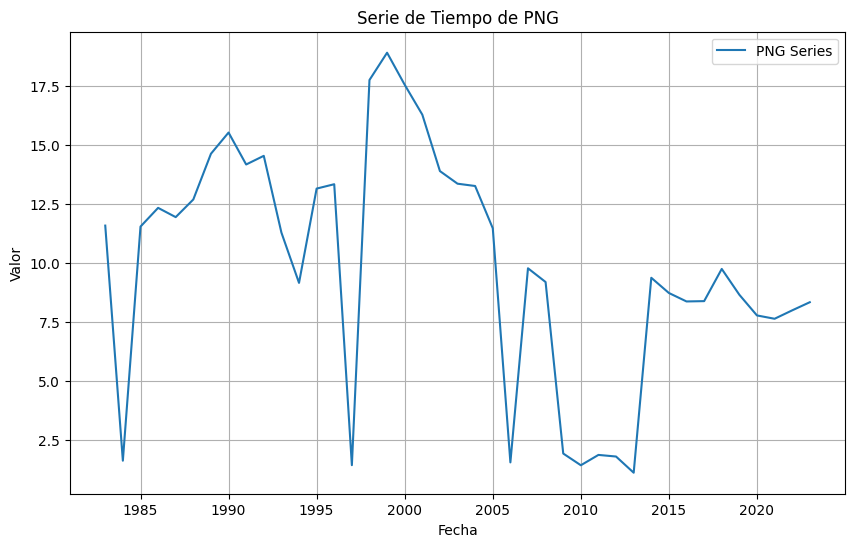

In [ ]:
# @title
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Extracting the PNG series
png_series = df[['Fecha', 'PNG']].dropna()
png_series['Fecha'] = pd.to_datetime(png_series['Fecha'], format='%Y')
png_series.set_index('Fecha', inplace=True)

# Plotting the PNG series to visualize it
plt.figure(figsize=(10, 6))
plt.plot(png_series, label='PNG Series')
plt.title('Serie de Tiempo de PNG')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

De la gr√°fica podemos ver que hay fluctuaciones significativas a partir de 1999 y caidas muy bajas y subidas muy significativas aprox cada 25 y 10 a√±os.

Veamos si es estacionario utilizando la prueba de Dickey-Fuller Aumentada (ADF)


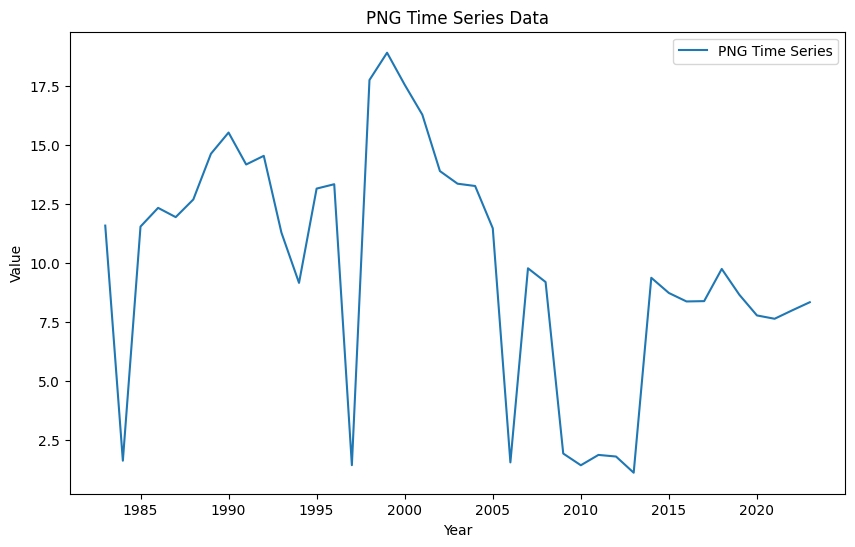

{'ADF Statistic': -3.4457154183479415,
 'p-value': 0.009495719878326838,
 'Used lag': 0,
 'Number of observations': 40,
 'Critical Values': {'1%': -3.6055648906249997,
  '5%': -2.937069375,
  '10%': -2.606985625}}

In [ ]:
# @title
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

png_data = df[['Fecha', 'PNG']].dropna()

# Convert 'Fecha' to datetime format for proper time series analysis
png_data['Fecha'] = pd.to_datetime(png_data['Fecha'], format='%Y')

# Set 'Fecha' as the index
png_data.set_index('Fecha', inplace=True)

# Plot the time series to visualize
plt.figure(figsize=(10, 6))
plt.plot(png_data, label='PNG Time Series')
plt.title('PNG Time Series Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Perform the Augmented Dickey-Fuller test to check for stationarity
adf_test = adfuller(png_data['PNG'])
adf_test_results = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Used lag': adf_test[2],
    'Number of observations': adf_test[3],
    'Critical Values': adf_test[4]
}

adf_test_results

Los resultados muestran un valor p de aproximadamente 0.0095. Dado que el valor p es menor que 0.05. Esto indica que la serie es estacionaria y podemos proceder a ajustar un modelo ARIMA o SARIMA.

Empecemos con un modelo ARIMA (1,0,1)

In [ ]:
# @title
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Ignore warnings from ARIMA model
warnings.filterwarnings("ignore")

# Fit the ARIMA model on the PNG data
model = ARIMA(png_data['PNG'], order=(1, 0, 1))  # ARIMA(p,d,q) where p=1, d=0, q=1
fitted_model = model.fit()

# Display the summary of the model
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    PNG   No. Observations:                   41
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -116.188
Date:                Mon, 02 Sep 2024   AIC                            240.377
Time:                        00:28:37   BIC                            247.231
Sample:                    01-01-1983   HQIC                           242.873
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7278      2.001      4.861      0.000       5.805      13.650
ar.L1          0.7917      0.199      3.970      0.000       0.401       1.183
ma.L1         -0.4028      0.241     -1.669      0.095      -0.876       0.070
sigma2        16.7804      3.835      4.375      0.000       9.263      24.298
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.60
Prob(Q):                              0.96   Prob(JB):                         0.17
Heteroskedasticity (H):               0.55   Skew:                            -0.52
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Los resultados nos dicen que del Coeficiente AR es significativo con p < 0.05.

El modelo parece ajustarse razonablemente bien a los datos. El coeficiente AR(1) es significativo, mientras que el coeficiente MA(1) es marginalmente no significativo con un p-valor de 0.095.

Ajustemos los lags y veamos los residuos.


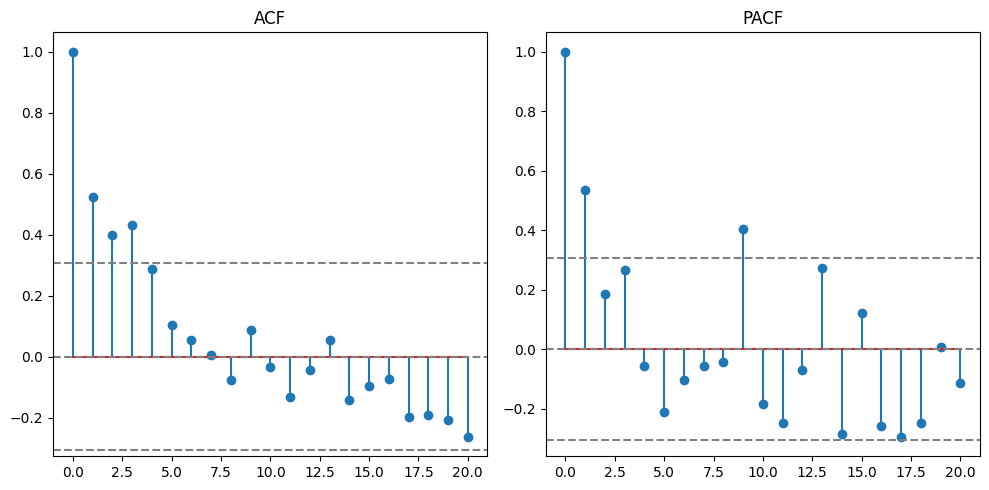

In [ ]:
# @title
# Calculate ACF and PACF with a smaller number of lags
max_lags = len(png_data['PNG']) // 2
lag_acf = acf(png_data['PNG'], nlags=max_lags)
lag_pacf = pacf(png_data['PNG'], nlags=max_lags)

# Plot ACF
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.stem(lag_acf, use_line_collection=True)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(png_data['PNG'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(png_data['PNG'])), linestyle='--', color='gray')
plt.title('ACF')

# Plot PACF
plt.subplot(122)
plt.stem(lag_pacf, use_line_collection=True)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(png_data['PNG'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(png_data['PNG'])), linestyle='--', color='gray')
plt.title('PACF')
plt.tight_layout()
plt.show()

El primer rezago de la PACF est√° fuera del intervalo de confianza, sugiriendo un posible valor de 1.

La prueba ADF indic√≥ que la serie es estacionaria, por lo que d=0.

Asi intentaremos con el modelo SARIMA(1, 0, 1) ajustado para la serie de Papua Nueva Guinea (PNG).

In [ ]:
# @title
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (initial guess p=1, d=0, q=1)
sarima_model = SARIMAX(png_data['PNG'], order=(1, 0, 1), seasonal_order=(0, 0, 0, 0))
sarima_fit = sarima_model.fit(disp=False)

# Display model summary
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    PNG   No. Observations:                   41
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -118.823
Date:                Mon, 02 Sep 2024   AIC                            243.647
Time:                        00:31:48   BIC                            248.788
Sample:                    01-01-1983   HQIC                           245.519
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9768      0.030     32.591      0.000       0.918       1.036
ma.L1         -0.5140      0.141     -3.648      0.000      -0.790      -0.238
sigma2        18.3522      4.049      4.533      0.000      10.416      26.288
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.02
Prob(Q):                              0.83   Prob(JB):                         0.13
Heteroskedasticity (H):               0.52   Skew:                            -0.51
Prob(H) (two-sided):                  0.23   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

muestra que los coeficientes de los t√©rminos autoregresivo (AR) y de media m√≥vil (MA) son significativos (p < 0.05).

Analicemos los residuos de nuestro modelo:

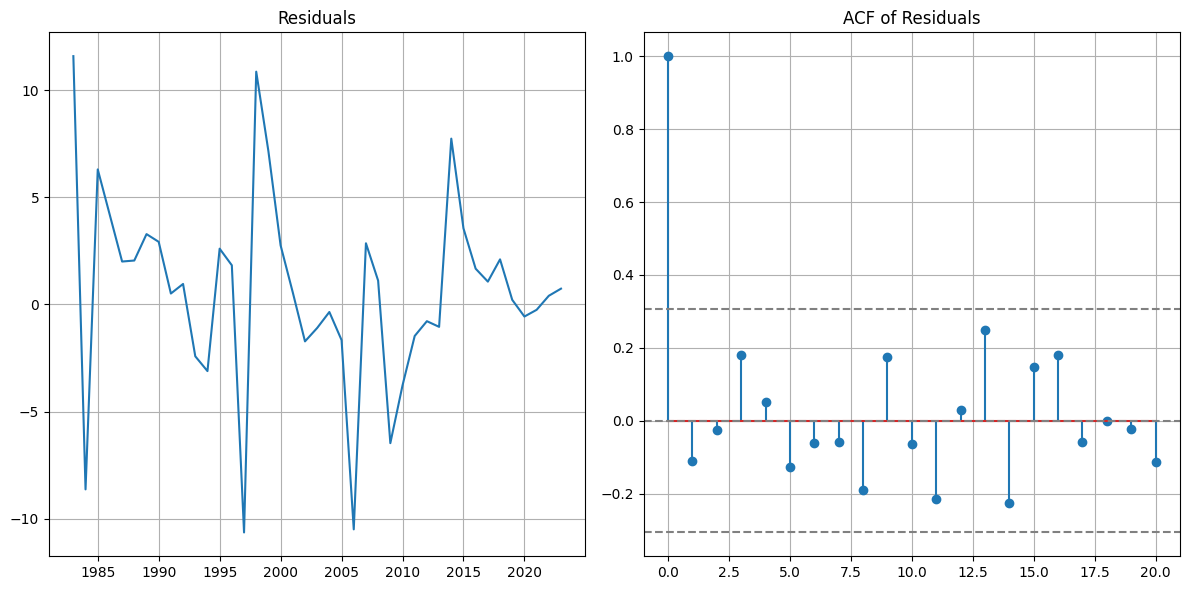

lb_stat  lb_pvalue
10  7.142178   0.711958

In [ ]:
# @title
# Diagnostic plots for residuals
residuals = sarima_fit.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals')
plt.grid(True)

# Plot ACF of residuals
plt.subplot(122)
plt.stem(acf(residuals, nlags=20), use_line_collection=True)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
plt.title('ACF of Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Perform Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
ljung_box_result

Los diagn√≥sticos de residuos muestran lo siguiente:

Gr√°fico de los residuos: Los residuos parecen distribuirse alrededor de cero sin patrones evidentes, lo que sugiere que el modelo puede estar capturando bien la din√°mica de la serie temporal.

ACF de los residuos: La funci√≥n de autocorrelaci√≥n de los residuos no muestra correlaciones significativas fuera del intervalo de confianza para la mayor√≠a de los rezagos, lo cual es una indicaci√≥n de que los residuos son aproximadamente ruido blanco.

Prueba de Ljung-Box: El valor p de la prueba de Ljung-Box para los primeros 10 rezagos es 0.712, lo cual es mucho mayor que 0.05. Esto indica que no hay evidencia suficiente para rechazar la hip√≥tesis nula de que los residuos son independientes, confirmando que el modelo est√° bien ajustado.

## Egipto

Veamos su gr√°fico

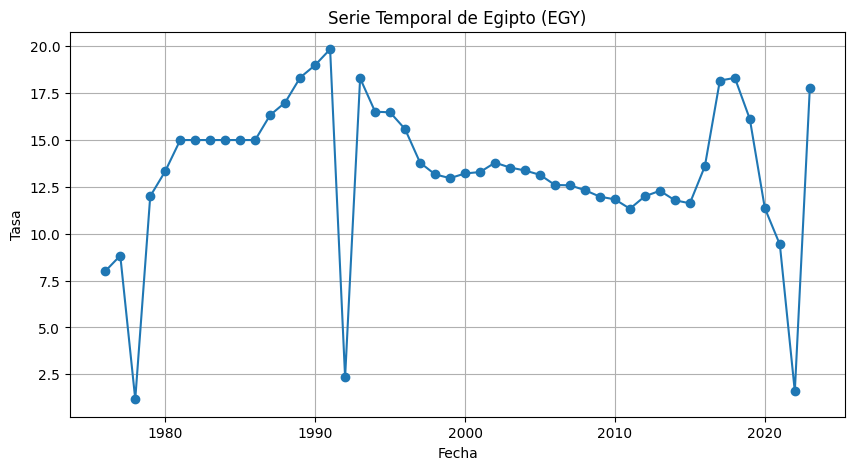

In [ ]:
# @title
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Extracting the data for Egypt (EGY)
egy_data = df[['Fecha', 'EGY']].dropna()
egy_data['Fecha'] = pd.to_datetime(egy_data['Fecha'], format='%Y')
egy_data.set_index('Fecha', inplace=True)

# Plotting the series to visualize
plt.figure(figsize=(10, 5))
plt.plot(egy_data, marker='o')
plt.title('Serie Temporal de Egipto (EGY)')
plt.ylabel('Tasa')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

De la gr√°fica podemos que ver que hay valles uno como de 15 a√±os y el otro como de 30 a√±os, al parecer al tomar valores m√°ximos tiene una ca√≠da muy fuerte.

Empecemos con una prueba de estacionariedad

In [ ]:
# @title
# Realizar la prueba Dickey-Fuller aumentada
adf_test = adfuller(egy_data['EGY'])

# Resultados de la prueba ADF
adf_results = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4]
}

adf_results

{'ADF Statistic': -5.360587367826237,
 'p-value': 4.0963677295006265e-06,
 'Lags Used': 0,
 'Number of Observations Used': 47,
 'Critical Values': {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064}}

El resultado de la prueba de Dickey-Fuller aumentada muestra un valor estad√≠stico de ADF de aproximadamente -5.36 con un p-valor muy peque√±o (4.10e-06), lo que indica que podemos rechazar la hip√≥tesis nula de que la serie tiene una ra√≠z unitaria. En otras palabras, la serie es estacionaria.

Dado que la serie ya es estacionaria, podemos proceder a ajustar un modelo ARIMA. Vamos a determinar los mejores par√°metros (p, d, q) para el modelo utilizando un an√°lisis de la funci√≥n de autocorrelaci√≥n (ACF) y la funci√≥n de autocorrelaci√≥n parcial (PACF).

Hacemos los gr√°ficos del ACF y PACF

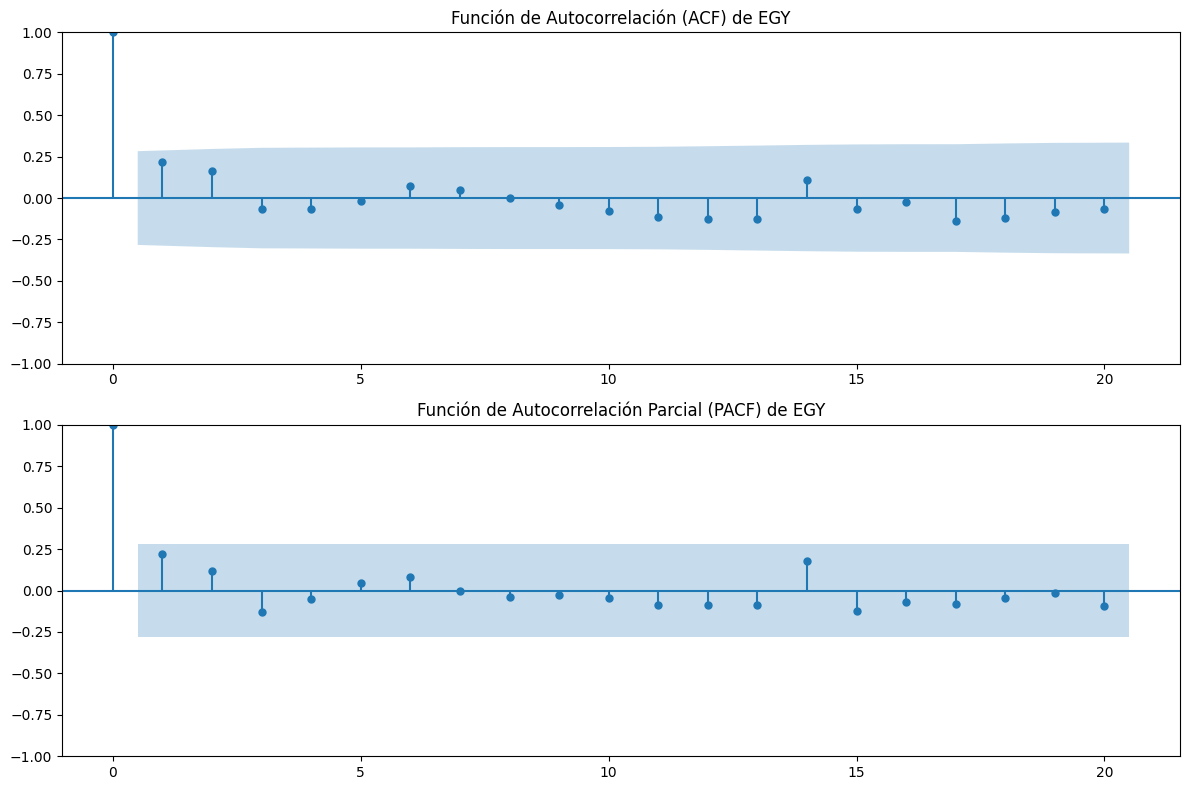

In [ ]:
# @title
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(egy_data['EGY'], lags=20, ax=ax[0])
ax[0].set_title('Funci√≥n de Autocorrelaci√≥n (ACF) de EGY')

plot_pacf(egy_data['EGY'], lags=20, ax=ax[1], method='ywm')
ax[1].set_title('Funci√≥n de Autocorrelaci√≥n Parcial (PACF) de EGY')

plt.tight_layout()
plt.show()

Las gr√°ficas de ACF y PACF nos ayudar√°n a identificar los par√°metros ùëù y q para el modelo ARIMA:

ACF (Funci√≥n de Autocorrelaci√≥n): La ACF decae lentamente, lo cual sugiere que podr√≠a haber un componente de media m√≥vil (q) en el modelo.

PACF (Funci√≥n de Autocorrelaci√≥n Parcial): La PACF muestra un corte brusco despu√©s del primer rezago, lo cual indica un posible valor para p del modelo autorregresivo.

Con base en estas observaciones, podemos comenzar con un modelo ARIMA (1,0,1)

Vamos a ajustar este modelo y revisar los resultados

In [ ]:
# @title
from statsmodels.tsa.arima.model import ARIMA

# Fitting an ARIMA model with p=1, d=0, q=1
arima_model = ARIMA(egy_data['EGY'], order=(1, 0, 1))
arima_result = arima_model.fit()

# Displaying the model summary
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    EGY   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -132.996
Date:                Mon, 02 Sep 2024   AIC                            273.993
Time:                        01:21:56   BIC                            281.477
Sample:                    01-01-1976   HQIC                           276.821
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2823      1.157     11.484      0.000      11.015      15.549
ar.L1          0.4715      0.477      0.989      0.323      -0.463       1.406
ma.L1         -0.2501      0.544     -0.460      0.646      -1.316       0.816
sigma2        14.9138      2.688      5.548      0.000       9.645      20.182
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                31.76
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -1.34
Prob(H) (two-sided):                  1.00   Kurtosis:                         5.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El modelo ARIMA(1, 0, 1) ha sido ajustado para la serie de Egipto.

Los coeficientes de los t√©rminos autorregresivo (AR) y de media m√≥vil (MA) no son estad√≠sticamente significativos (p-valores mayores a 0.05), lo que sugiere que estos t√©rminos pueden no ser necesarios.

Estad√≠sticos de ajuste: El valor de AIC (273.993) y BIC (281.477) pueden ser utilizados para comparar este modelo con otros modelos potenciales.

Dado que los coeficientes no son significativos, podr√≠amos probar otros modelos o simplificar el modelo actual.

## Malawi

Veamos su gr√°fico y comentemos

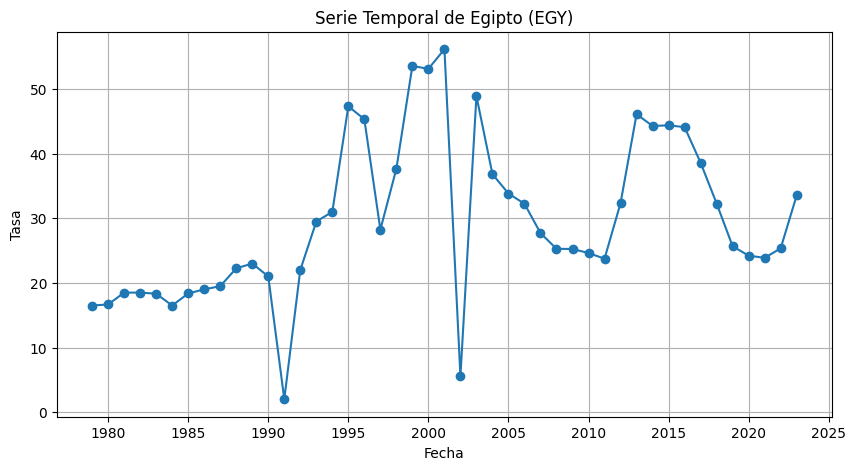

In [ ]:
# @title
import matplotlib.pyplot as plt


# Plot the time series data for Malawi

malawi_data = df[['Fecha', 'MWI']].dropna()
malawi_data['Fecha'] = pd.to_datetime(malawi_data['Fecha'], format='%Y')
malawi_data.set_index('Fecha', inplace=True)

# Plotting the series to visualize
plt.figure(figsize=(10, 5))
plt.plot(malawi_data, marker='o')
plt.title('Serie Temporal de Malawi (MWI)')
plt.ylabel('Tasa')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

Podemos ver que tiene valles aprox cada 12 a√±os, pero posteriormente tiene subidas muy repentinas y fuertes. Tiene una tendencia a la alza.

Realicemos la prueba de ADF para evaluar si es estacionaria.

In [ ]:
# @title
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(malawi_data['MWI'])

# Display the ADF test results
adf_test_output = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Critical Values': adf_result[4]
}

adf_test_output

{'ADF Statistic': -3.8275352114879304,
 'p-value': 0.0026378294857963367,
 'Critical Values': {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025}}

Dado que el valor p es menor que 0.05 y el estad√≠stico ADF es menor que los valores cr√≠ticos al 1%, 5% y 10%, podemos rechazar la hip√≥tesis nula de que la serie tiene una ra√≠z unitaria. Esto sugiere que la serie es estacionaria.

Dado que la serie es estacionaria, podemos proceder con el ajuste de un modelo ARIMA. Vamos a determinar los par√°metros √≥ptimos para el modelo ARIMA (0,1,1) que parece ser el mejor ajuste para nuestro modelo. ‚Äã

In [ ]:
# @title
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Suppress warnings
warnings.filterwarnings("ignore")

# Define the range of p, d, q parameters
p = d = q = range(0, 3)

# Generate all different combinations of p, q, and q triplets
pdq = list(itertools.product(p, d, q))

# Initialize a list to store results
results = []

# Grid search to find the best ARIMA model
for param in pdq:
    try:
        model = ARIMA(malawi_data['MWI'], order=param)
        model_fit = model.fit()
        results.append((param, model_fit.aic))
    except:
        continue

# Find the parameters with the minimum AIC
best_param = min(results, key=lambda x: x[1])
best_param

((0, 1, 1), 339.859402132825)

In [ ]:
# @title
# Fit the ARIMA(0, 1, 1) model
best_arima_model = ARIMA(malawi_data['MWI'], order=(0, 1, 1))
best_arima_model_fit = best_arima_model.fit()

# Display the summary of the fitted ARIMA model
best_arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    MWI   No. Observations:                   45
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -167.930
Date:                Mon, 02 Sep 2024   AIC                            339.859
Time:                        01:33:14   BIC                            343.428
Sample:                    01-01-1979   HQIC                           341.183
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5680      0.125     -4.559      0.000      -0.812      -0.324
sigma2       119.8730     18.550      6.462      0.000      83.515     156.231
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                73.01
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -1.49
Prob(H) (two-sided):                  0.72   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El siguiente paso es verificar los residuos del modelo.

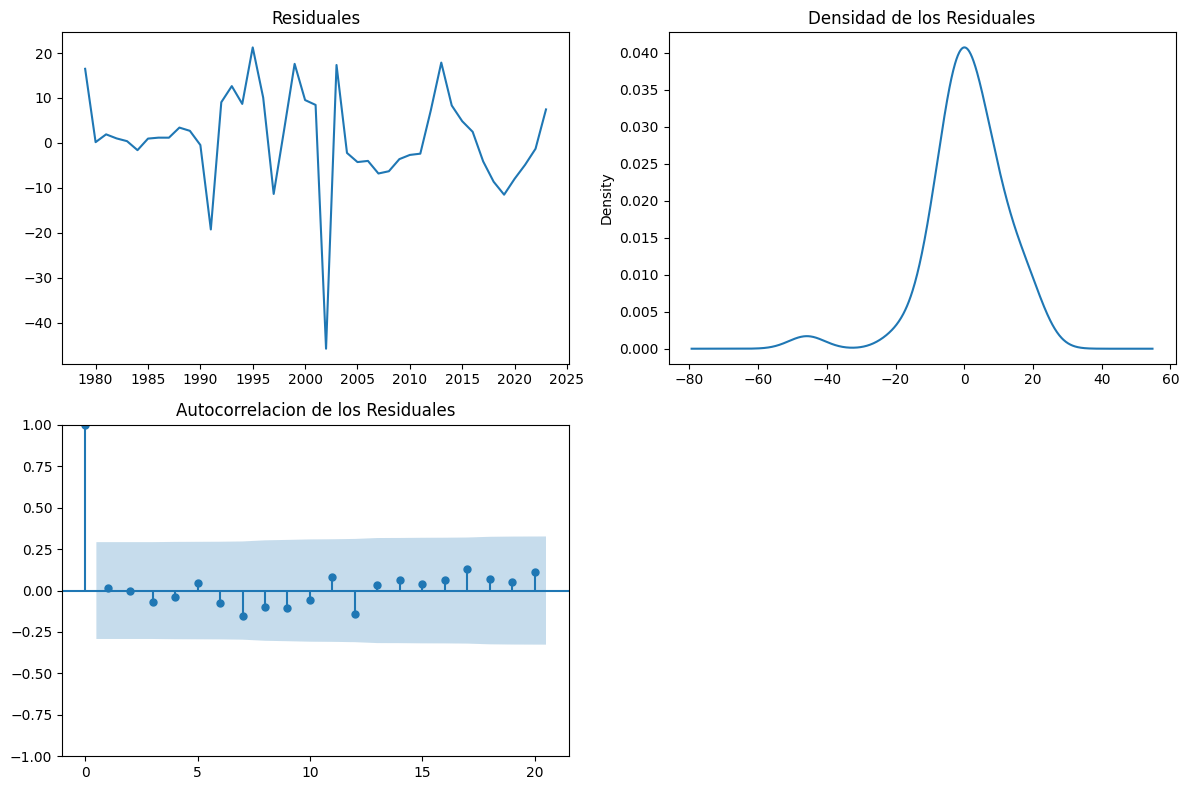

In [ ]:
# @title
# Plot residual diagnostics
residuals = best_arima_model_fit.resid

plt.figure(figsize=(12, 8))

# Residuals plot
plt.subplot(221)
plt.plot(residuals)
plt.title('Residuales')

# KDE plot of residuals
plt.subplot(222)
residuals.plot(kind='kde')
plt.title('Densidad de los Residuales')

# Q-Q plot
plt.subplot(223)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelacion de los Residuales')

plt.tight_layout()
plt.show()

De acuerdo a los diagn√≥sticos de los residuos del modelo ARIMA(0, 1, 1) para la serie temporal de Malawi:

De la gr√°fica de los residuos: Muestra que los residuos fluct√∫an alrededor de cero, lo cual es un buen indicio de que el modelo puede estar bien ajustado.

De la gr√°fica de densidad de los residuos: La distribuci√≥n de los residuos parece aproximarse a una distribuci√≥n normal, aunque no es perfectamente sim√©trica.

Gr√°fica de autocorrelaci√≥n (ACF) de los residuos: No muestra autocorrelaciones significativas en los residuos, lo cual sugiere que no hay patrones no capturados por el modelo.

Estos resultados sugieren que los residuos del modelo son aproximadamente un ruido blanco, lo cual es un buen indicador de que el modelo es adecuado para la serie temporal.

## Ucrania

Veamos su gr√°fico

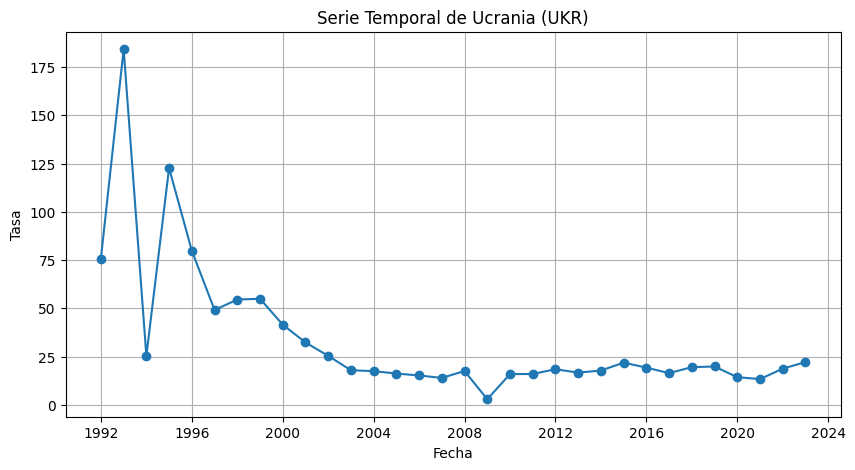

In [ ]:
# @title
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Extracting the data for Egypt (EGY)
ukr_data = df[['Fecha', 'UKR']].dropna()
ukr_data['Fecha'] = pd.to_datetime(ukr_data['Fecha'], format='%Y')
ukr_data.set_index('Fecha', inplace=True)

# Plotting the series to visualize
plt.figure(figsize=(10, 5))
plt.plot(ukr_data, marker='o')
plt.title('Serie Temporal de Ucrania (UKR)')
plt.ylabel('Tasa')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

Vemos una tendencia a la baja, no se ve una estacionalidad a simple vista

Vamos a descomponer la serie a ver si eso nos apoya:

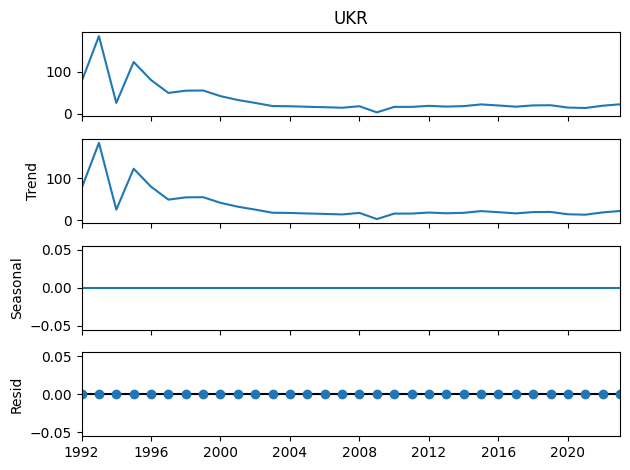

In [ ]:
# @title
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series to observe trend and seasonality
decomposition = seasonal_decompose(ukr_data['UKR'], model='additive', period=1)

# Plotting the decomposed components
decomposition.plot()
plt.show()

La descomposici√≥n de la serie temporal muestra los componentes de tendencia, estacionalidad y residuales. Parece que la serie tiene una tendencia clara, pero la estacionalidad no es muy evidente.

Para elegir entre un modelo ARIMA o SARIMA, necesitamos comprobar si hay estacionalidad. Dado que la estacionalidad no es pronunciada, un modelo ARIMA podr√≠a ser adecuado.

In [ ]:
# @title
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range of p, d, q for ARIMA model
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q
pdq = list(itertools.product(p, d, q))

# Find the best ARIMA model based on AIC
best_aic = float("inf")
best_pdq = None

for param in pdq:
    try:
        model = ARIMA(ukr_data['UKR'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

best_pdq, best_aic

((2, 2, 2), 261.59951834080596)

El modelo ARIMA(2, 2, 2) es el mejor ajustado a los datos de Ucrania.

Los Coeficientes AR: Los coeficientes autorregresivos (AR) son significativos, lo que indica que los valores anteriores tienen un impacto en los valores futuros.

Los Coeficientes MA: Los coeficientes de media m√≥vil (MA) no son significativos, lo cual sugiere que los errores pasados no tienen un impacto claro en los errores futuros.

El AIC: 261.6, lo que indica la calidad del modelo. Un AIC m√°s bajo generalmente indica un mejor modelo.

## M√©xico

Veamos primero su gr√°fico

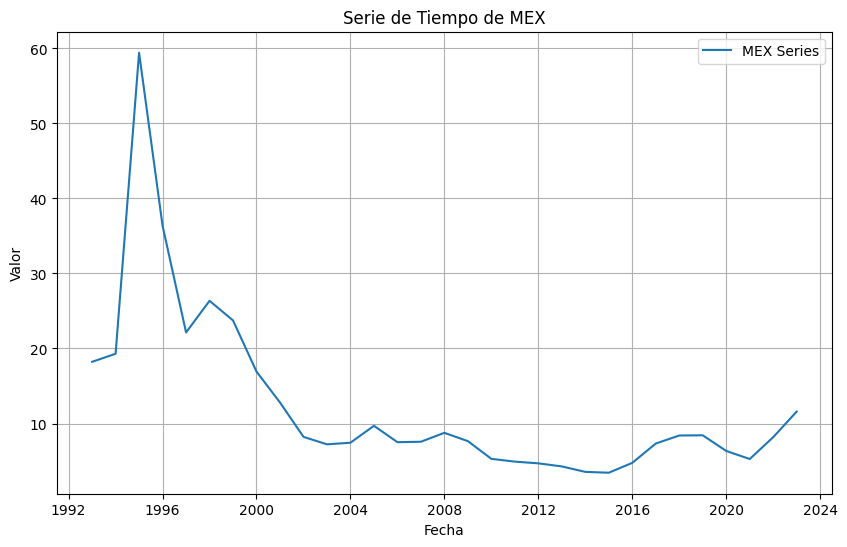

In [ ]:
# @title
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Extracting the PNG series
png_series = df[['Fecha', 'MEX']].dropna()
png_series['Fecha'] = pd.to_datetime(png_series['Fecha'], format='%Y')
png_series.set_index('Fecha', inplace=True)

# Plotting the PNG series to visualize it
plt.figure(figsize=(10, 6))
plt.plot(png_series, label='MEX Series')
plt.title('Serie de Tiempo de MEX')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

Aqu√≠ podemos ver que aproximadamente a partir de 1994 se ve una baja en las Tasas de Inter√©s, manteniendo una varianza casi constante entre 2004 a 2022.

Podemos ver que justo en estos a√±os acontecen hechos importantes en el pa√≠s, como la devaluaci√≥n en 1993 y con la alza de tasas post pandemia en 2021

No es posible con tan pocos registros solo hay datos desde 1993

# Ejercicio 3

Modele y verifique la validez de su modelo, a parir del 2016, la siguiente serie mexicana del archivo Indicadores20240824185638.xlsx


In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [ ]:
# @title
serie=pd.read_excel("/content/sample_data/Indicadores20240824185638.xls")
serie

Periodos        INPP
0    2016/01   82.895631
1    2016/02   83.644267
2    2016/03   83.703321
3    2016/04   83.918314
4    2016/05   84.529269
..       ...         ...
98   2024/03  123.571206
99   2024/04  124.213928
100  2024/05  124.860560
101  2024/06  126.465907
102  2024/07  127.277276

[103 rows x 2 columns]

Analisis descriptivo por Box-Jenkins

Grafica de dispersion de la serie temporal

Text(0.5, 1.0, 'Historico')

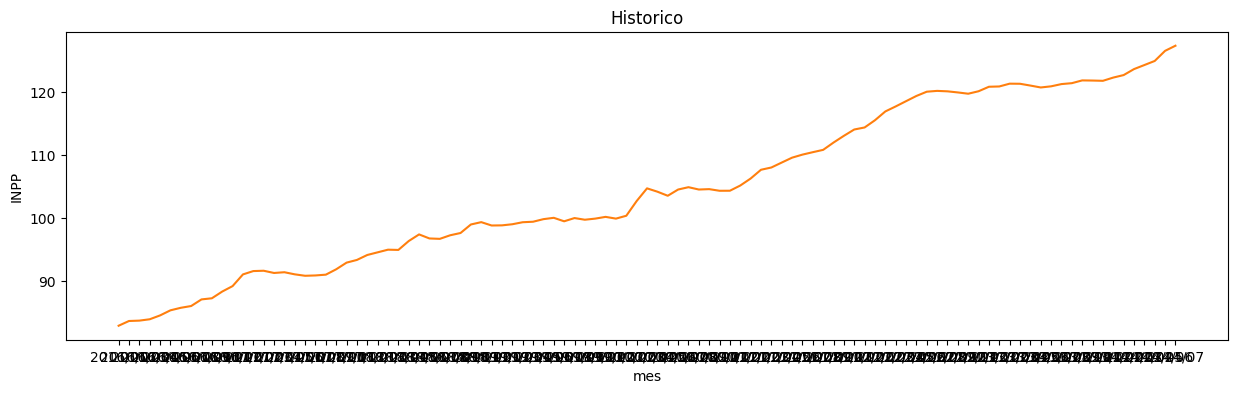

In [ ]:
# @title
plt.figure (figsize=(15,4), dpi=100)
plt.plot(serie['Periodos'],serie['INPP'], color='tab:orange' )
plt.xlabel('mes')
plt.ylabel('INPP')
plt.title('Historico')

En la grafica se aprecia una tendencia creciente, por lo cual podemos decir a simple vista que la serie es no estacionaria, vamos a corroborrar con las realciones de autorregresion

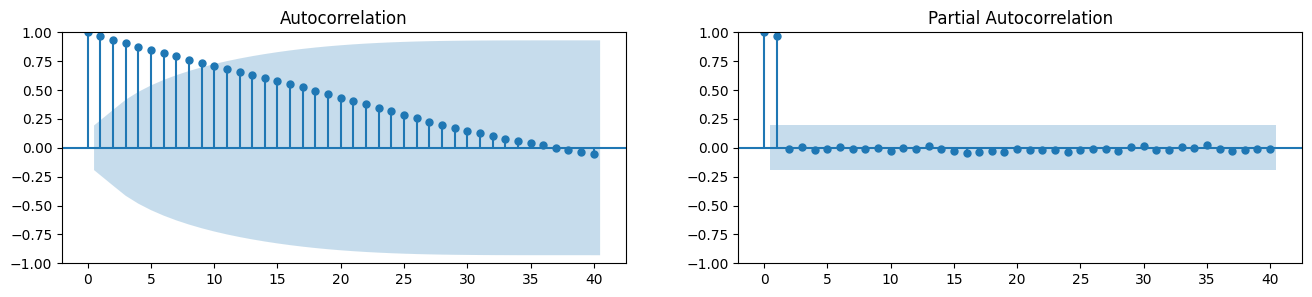

In [ ]:
# @title
fig, axes=plt.subplots(1,2, figsize=(16,3), dpi=100)
plot_acf(serie['INPP'], lags=40, ax=axes[0])
plot_pacf(serie['INPP'], lags=40, ax=axes[1])
plt.show()

En ambas graficas podemos observar que la FAC decae lentamente, por lo que podemos observar que nuestra serie es no estacionaria, vamos a descomponerla.

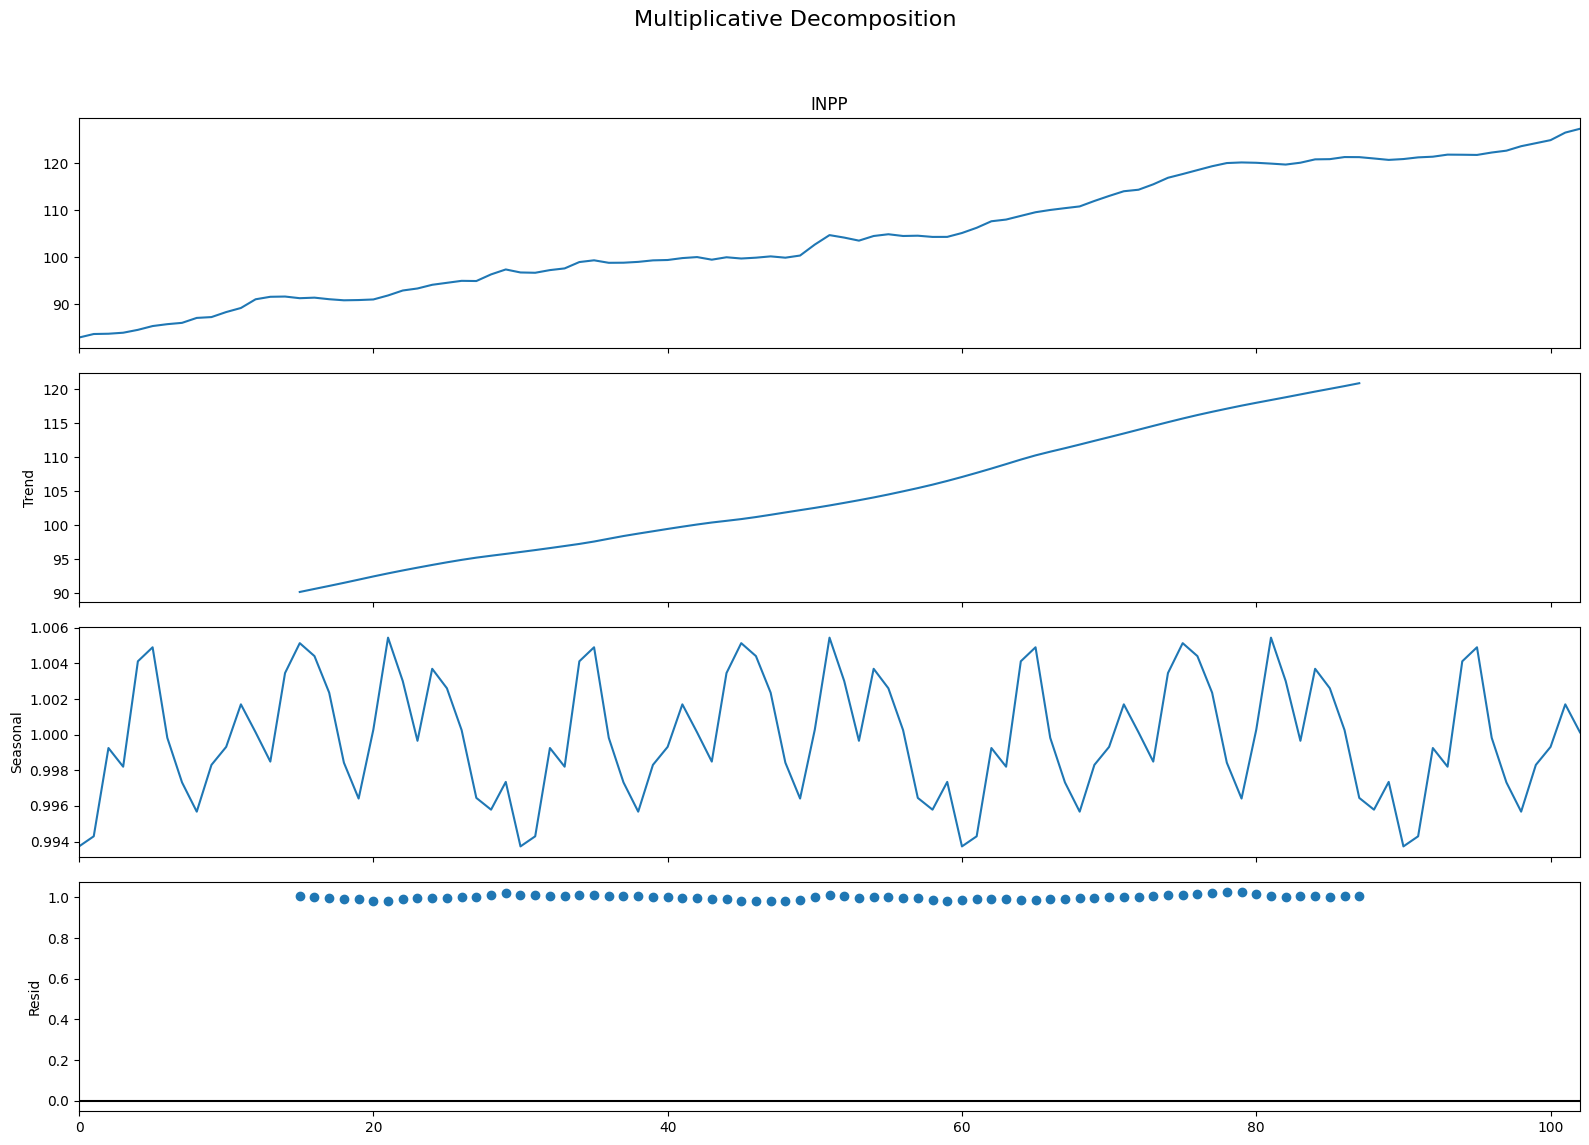

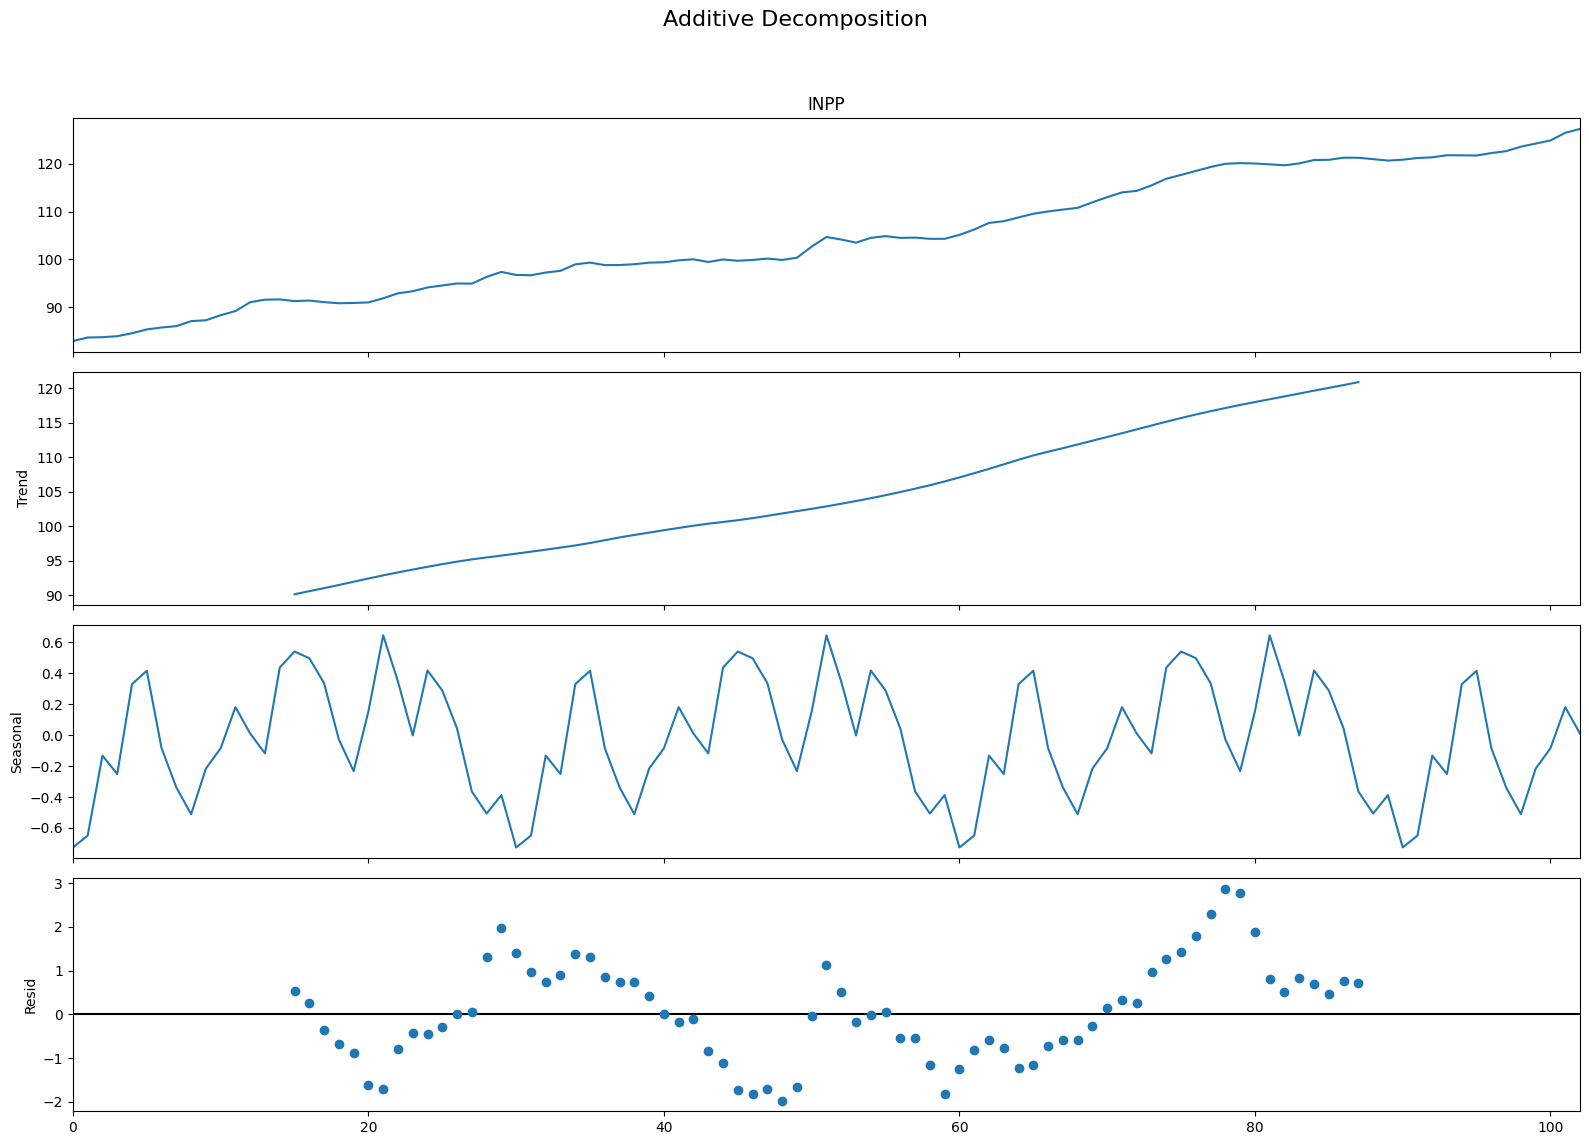

In [ ]:
# @title
#Descomposici√≥n
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(serie['INPP'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(serie['INPP'], model='additive', period=30)

# GRAFICACI√ìN
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

profundizando en el analisis descriptivo de la serie, aproximadamnete cada 30 meses hay estacionalidad.

Tentativamente establecemos que la serie no es estacionaria en media, presenta estacionalidad y parece ser estacionaria en varianza.

Entonces para subsanar la no estacionariedad en media, aplicamos primero logatirmo natural y despues la diferencia.

In [ ]:
# @title
serie['log_INPP']=np.log(serie['INPP'])
serie['log_INPP_diff']=serie['log_INPP'].diff()

print(serie.head())

  Periodos       INPP  log_INPP  log_INPP_diff
0  2016/01  82.895631  4.417582            NaN
1  2016/02  83.644267  4.426573       0.008991
2  2016/03  83.703321  4.427279       0.000706
3  2016/04  83.918314  4.429844       0.002565
4  2016/05  84.529269  4.437098       0.007254


Comprobamos nuevamente con un analisis descriptivo

Text(0.5, 1.0, 'Historico')

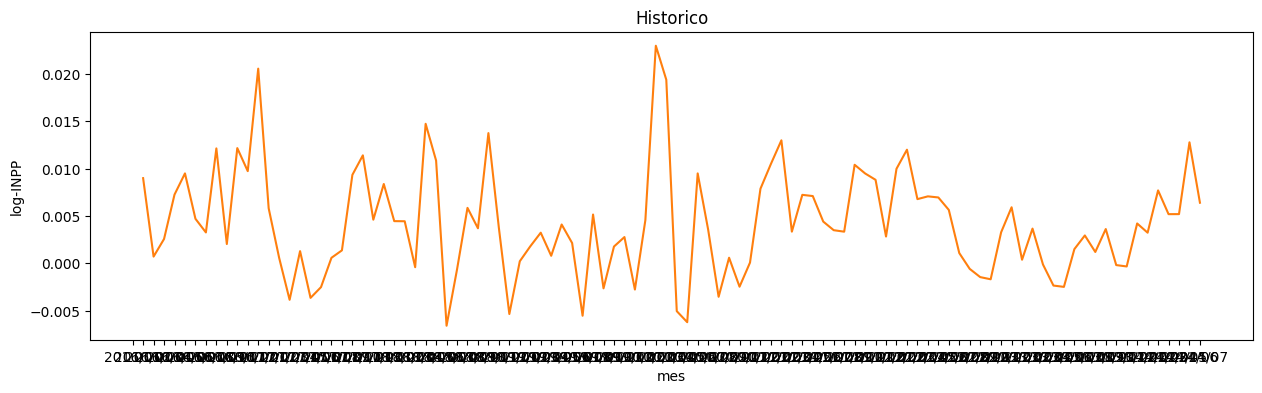

In [ ]:
# @title
plt.figure (figsize=(15,4), dpi=100)
plt.plot(serie['Periodos'],serie['log_INPP_diff'], color='tab:orange' )
plt.xlabel('mes')
plt.ylabel('log-INPP')
plt.title('Historico')

Pareceria que ya es estacionaria tanto en media como en varianza, por lo que se ha corregido.

Se corrorbora con la dispersion de serie con una diferecnia al logaritmo-INPP, que la serie ya es estacionaria en media y varianza.

Vamos a corroborar con las funciones de autocorrelacion.

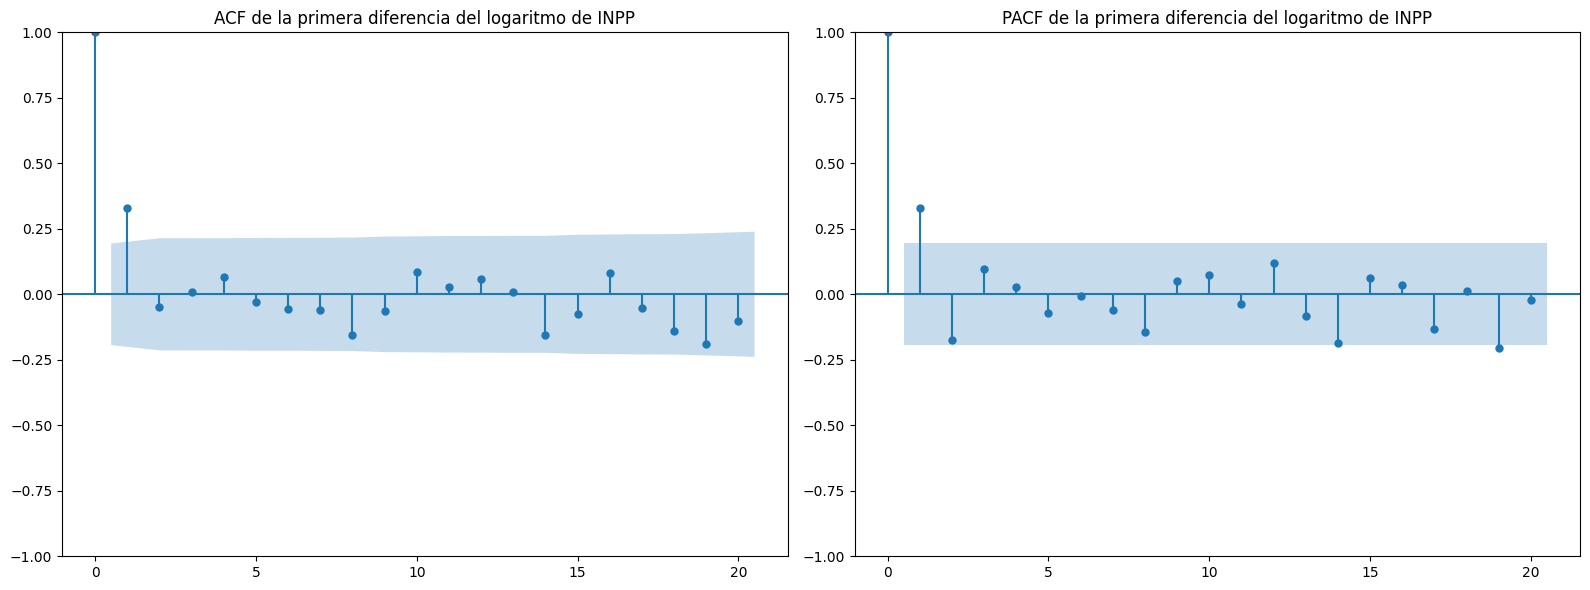

In [ ]:
# @title
# Aseg√∫rate de que no haya valores NaN en la columna antes de graficar
serie_ = serie['log_INPP_diff'].dropna()

# Crear subplots para ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gr√°fico de la ACF
plot_acf(serie_, lags=20, ax=axes[0])
axes[0].set_title('ACF de la primera diferencia del logaritmo de INPP')

# Gr√°fico de la PACF
plot_pacf(serie_, lags=20, ax=axes[1])
axes[1].set_title('PACF de la primera diferencia del logaritmo de INPP')

# Mostrar las gr√°ficas
plt.tight_layout()
plt.show()

Se verifica en las ACF y PACF que nuestra serie INPP logramos tranformarla en una serie estacionaria (en media y varianza)

Estimacion

En la gr√°fica de la ACF, el primer rezago es muy significativo y luego decrece r√°pidamente. Dado que el primer pico significativo est√° en el rezago 1, vamos a considerar $q=1$ como punto de partida.

De acuerdo a los resultados vamos a porponer dos modelos ARIMA

$ARIMA(p_{PACF},d, q_{ACF}) = ARIMA (1,1,1)$

In [ ]:
# @title
# Ajustar el modelo ARIMA
# Usa los valores de p y q basados en los gr√°ficos ACF y PACF
p = 1  # Ajustar seg√∫n el gr√°fico PACF
q = 1  # Ajustar seg√∫n el gr√°fico ACF
d = 0 # debido a la diferenciaci√≥n
modelo = ARIMA(serie['log_INPP_diff'], order=(p, d, q))
mod_salida = modelo.fit()
mod_salida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          log_INPP_diff   No. Observations:                  103
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 390.913
Date:                Mon, 02 Sep 2024   AIC                           -773.827
Time:                        01:11:51   BIC                           -763.288
Sample:                             0   HQIC                          -769.558
                                - 103                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.001      5.339      0.000       0.003       0.006
ar.L1         -0.1432      0.184     -0.778      0.436      -0.504       0.217
ma.L1          0.5566      0.140      3.966      0.000       0.282       0.832
sigma2      2.738e-05    3.4e-06      8.060      0.000    2.07e-05     3.4e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                14.27
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.70
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$ARIMA(p_{PACF},d, q_{ACF}) = ARIMA (0,1,1)$

In [ ]:

# @title
# Ajustar el modelo ARIMA
# Usa los valores de p y q basados en los gr√°ficos ACF y PACF
p = 0  # Ajustar seg√∫n el gr√°fico PACF
q = 1  # Ajustar seg√∫n el gr√°fico ACF
d = 0 # debido a la diferenciaci√≥n
modelo = ARIMA(serie['log_INPP_diff'], order=(p, d, q))
mod_salida = modelo.fit()
mod_salida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          log_INPP_diff   No. Observations:                  103
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 391.129
Date:                Mon, 02 Sep 2024   AIC                           -776.258
Time:                        01:12:23   BIC                           -768.354
Sample:                             0   HQIC                          -773.056
                                - 103                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.001      5.439      0.000       0.003       0.006
ma.L1          0.4113      0.091      4.503      0.000       0.232       0.590
sigma2      2.725e-05   3.29e-06      8.274      0.000    2.08e-05    3.37e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                11.85
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.62
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

podemos concluir que en el modelo $ARIMA(0,1,1)$ el p-valor en la media movil es significativo, y observando el valor de BIC, tomamos estos valores de p,d y q como buenos, debido a que su BIC es el mas peque√±o.

Pronostico.

In [ ]:
# @title
predictions = mod_salida.get_forecast(len(serie['log_INPP_diff']))
predictions_serie = predictions.conf_int(alpha = 0.05)
predictions_serie["Predictions"] = mod_salida.predict(start =
predictions_serie.index[0], end = predictions_serie.index[-1])
predictions_serie.index = serie['log_INPP_diff']
predictions_arma = predictions_serie["Predictions"]
predictions_arma

print(predictions_arma.values [0:14])

[0.00375989 0.00422677 0.00422677 0.00422677 0.00422677 0.00422677
 0.00422677 0.00422677 0.00422677 0.00422677 0.00422677 0.00422677
 0.00422677 0.00422677]


Aunque el test de Jarque-Bera indica que los residuos del modelo ARIMA(0,1,1) no siguen una distribuci√≥n normal, el modelo captura de manera efectiva la tendencia y la estacionalidad de la serie.

En resumen, el modelo sugiere que existe una tendencia al alza en la serie (constante positiva).
Los valores pasados tienen un impacto positivo en los valores futuros, aunque no es extremadamente fuerte.
Los errores pasados no parecen tener una influencia significativa en los valores futuros.

#Ejercicio 4

Modele y valide, la serie del archivo ‚Äòdataset.txt‚Äô. Adem√°s establezca el modelo matem√°tico estimado en su forma original.


In [ ]:
# @title
import numpy as np #'numpy para el manejo de arreglos
import pandas as pd

In [ ]:
# @title
data=pd.read_csv("/content/sample_data/dataset.txt")
data

date      value
0    1991-07-01   3.526591
1    1991-08-01   3.180891
2    1991-09-01   3.252221
3    1991-10-01   3.611003
4    1991-11-01   3.565869
..          ...        ...
199  2008-02-01  21.654285
200  2008-03-01  18.264945
201  2008-04-01  23.107677
202  2008-05-01  22.912510
203  2008-06-01  19.431740

[204 rows x 2 columns]

Analisis Descriptivo
Gr√°fica de dispersi√≥n

Text(0.5, 1.0, 'Hist√≥rico')

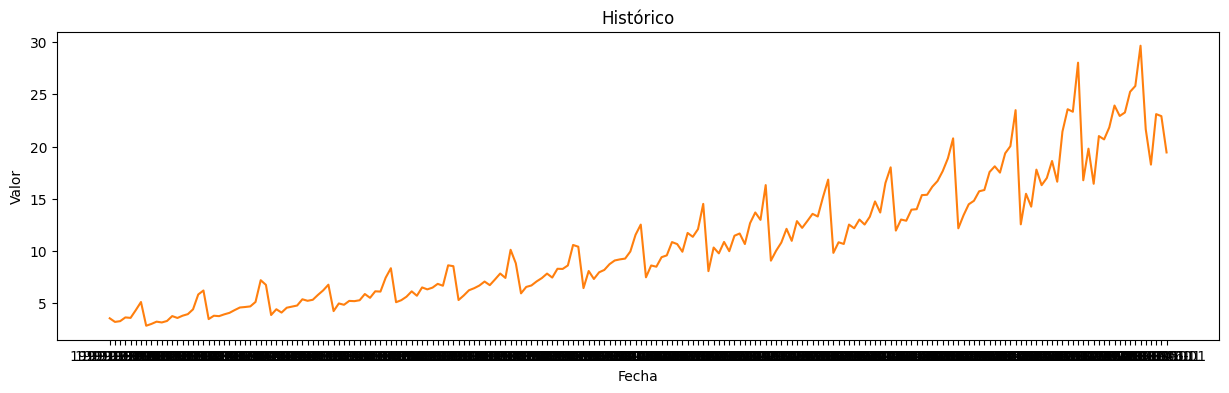

In [ ]:
# @title
import matplotlib.pyplot as plt

plt.figure (figsize=(15,4), dpi=100)
plt.plot(bd['date'],bd['value'], color='tab:orange' )
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Hist√≥rico')

En el analisis descriptivo se aprecia que la gr√°fica tiene tendencia positiva, es decir no es estacionaria en media, pero si podr√≠a ser estacionaria en varianza (heteroced√°stica). De igual manera se aprecia que podr√≠a tener estacionalidad.

Estacionariedad (Confirmaci√≥n)

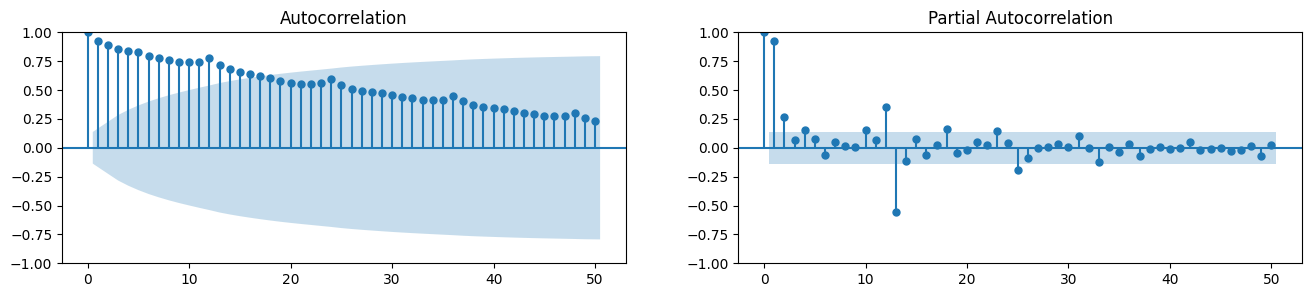

In [ ]:

# @title
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(bd['value'].tolist(), lags=50, ax=axes[0])
plot_pacf(bd['value'].tolist(), lags=50, ax=axes[1]);

Por medio de la ACF y PACF. Vemos que la gr√°fica ACF no tiene un comportamiento de abanico. No podemos concluir que exista estacionalidad, si hubiera una estacionalidad marcada, esperar√≠amos ver picos significativos en la ACF y PACF a intervalos regulares correspondientes al per√≠odo estacional. De igual manera no podemos concluir que exista estacionariedad, por que podriamos aplicar una transformaci√≥n para hacerla estacionaria.

Comprobando por DFA

La D-F_A para reafirmar o concluir estacionariedad de la serie es $ I(0) $

$$H_0: serie\ \ No\ \ estacionaria\ \ (\equiv \rho=1) $$

In [ ]:
# @title
# Punto 1 DFA
# import statsmodels
from statsmodels.tsa.stattools import adfuller

# ADF Test
prueba_DF = adfuller(bd['value'], autolag='AIC') #Ho: serie No estacionaria

print(f'ADF Statistic: {prueba_DF[0]}')
print(f'n_lags: {prueba_DF[2]}')
print(f'p-value: {prueba_DF[1]}')
for key, value in   prueba_DF[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930673
n_lags: 15
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


Por medio de la m√©todologia Dicky Fuller u debido a que el estadistico ADF es mucho mayor que los valores criticos no podemos rehazar la hipotesis nula. Por lo tanto la serie de tiempo no es estacionaria. Esto implica que la media, varianza o autocorrelaci√≥n de la serie cambian a lo largo del tiempo. Comprobamos que se necesita hacer una transformaci√≥n para hacerla estacioaria.

Descomposici√≥n para verificar estacionalidad.

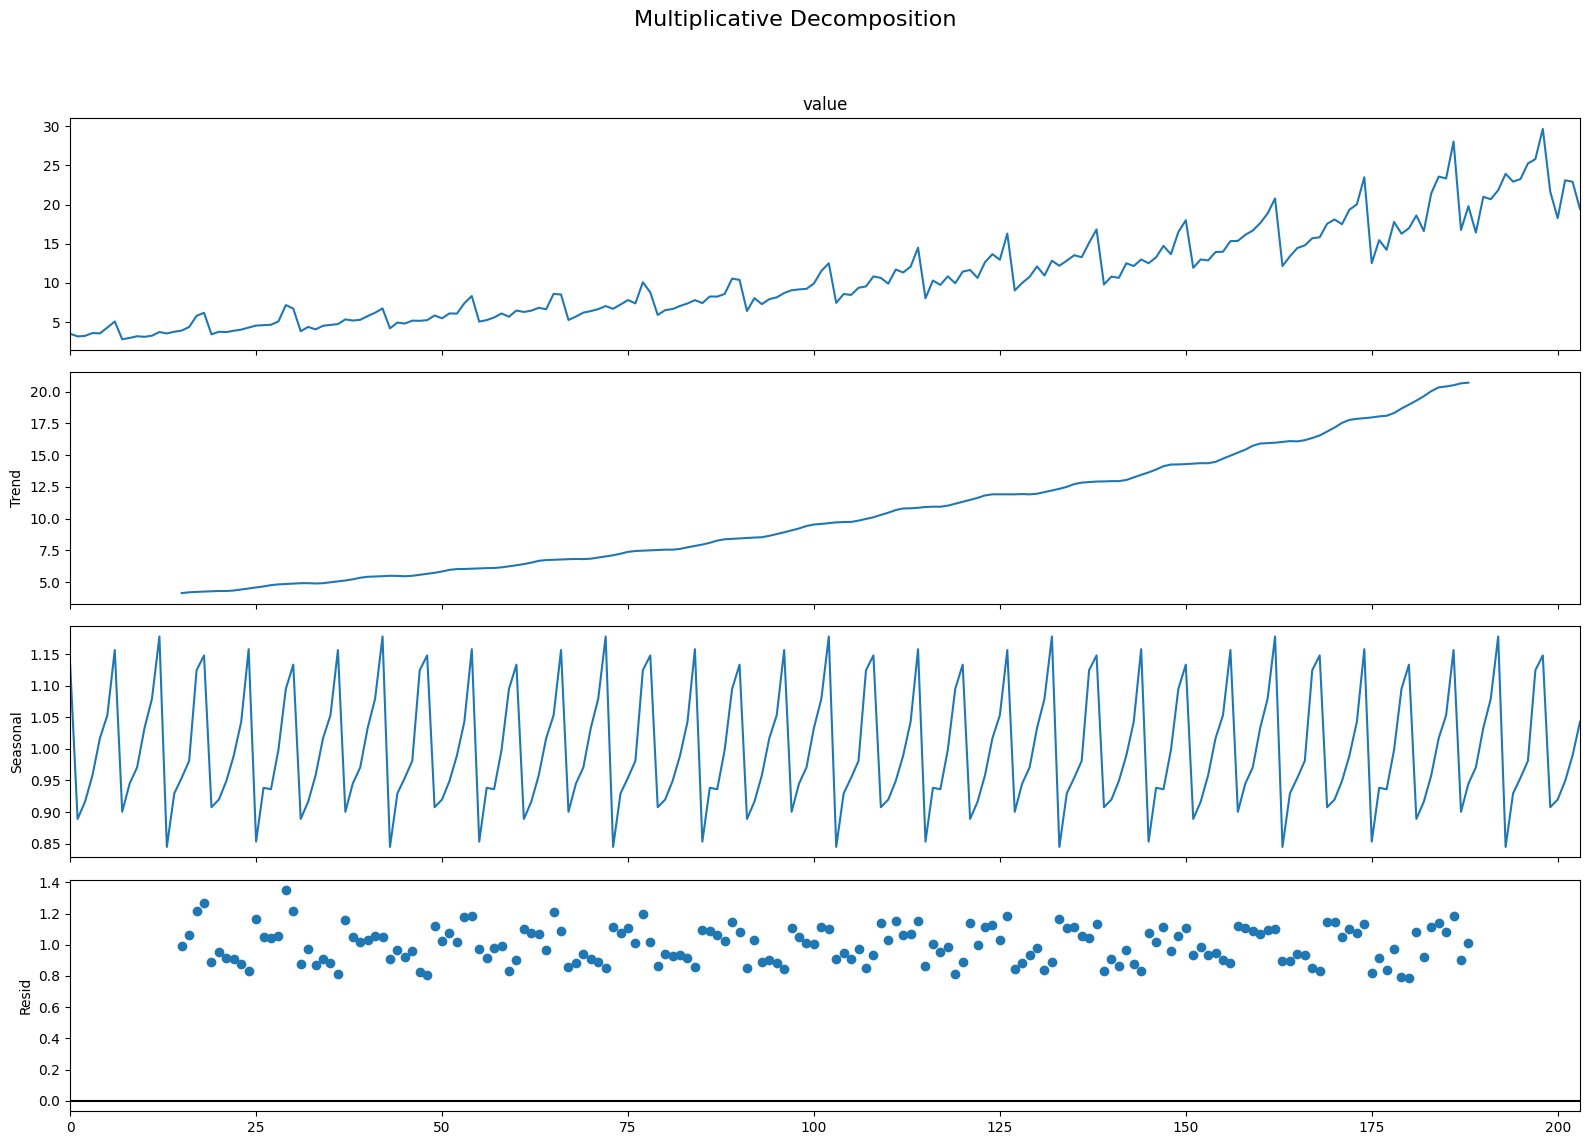

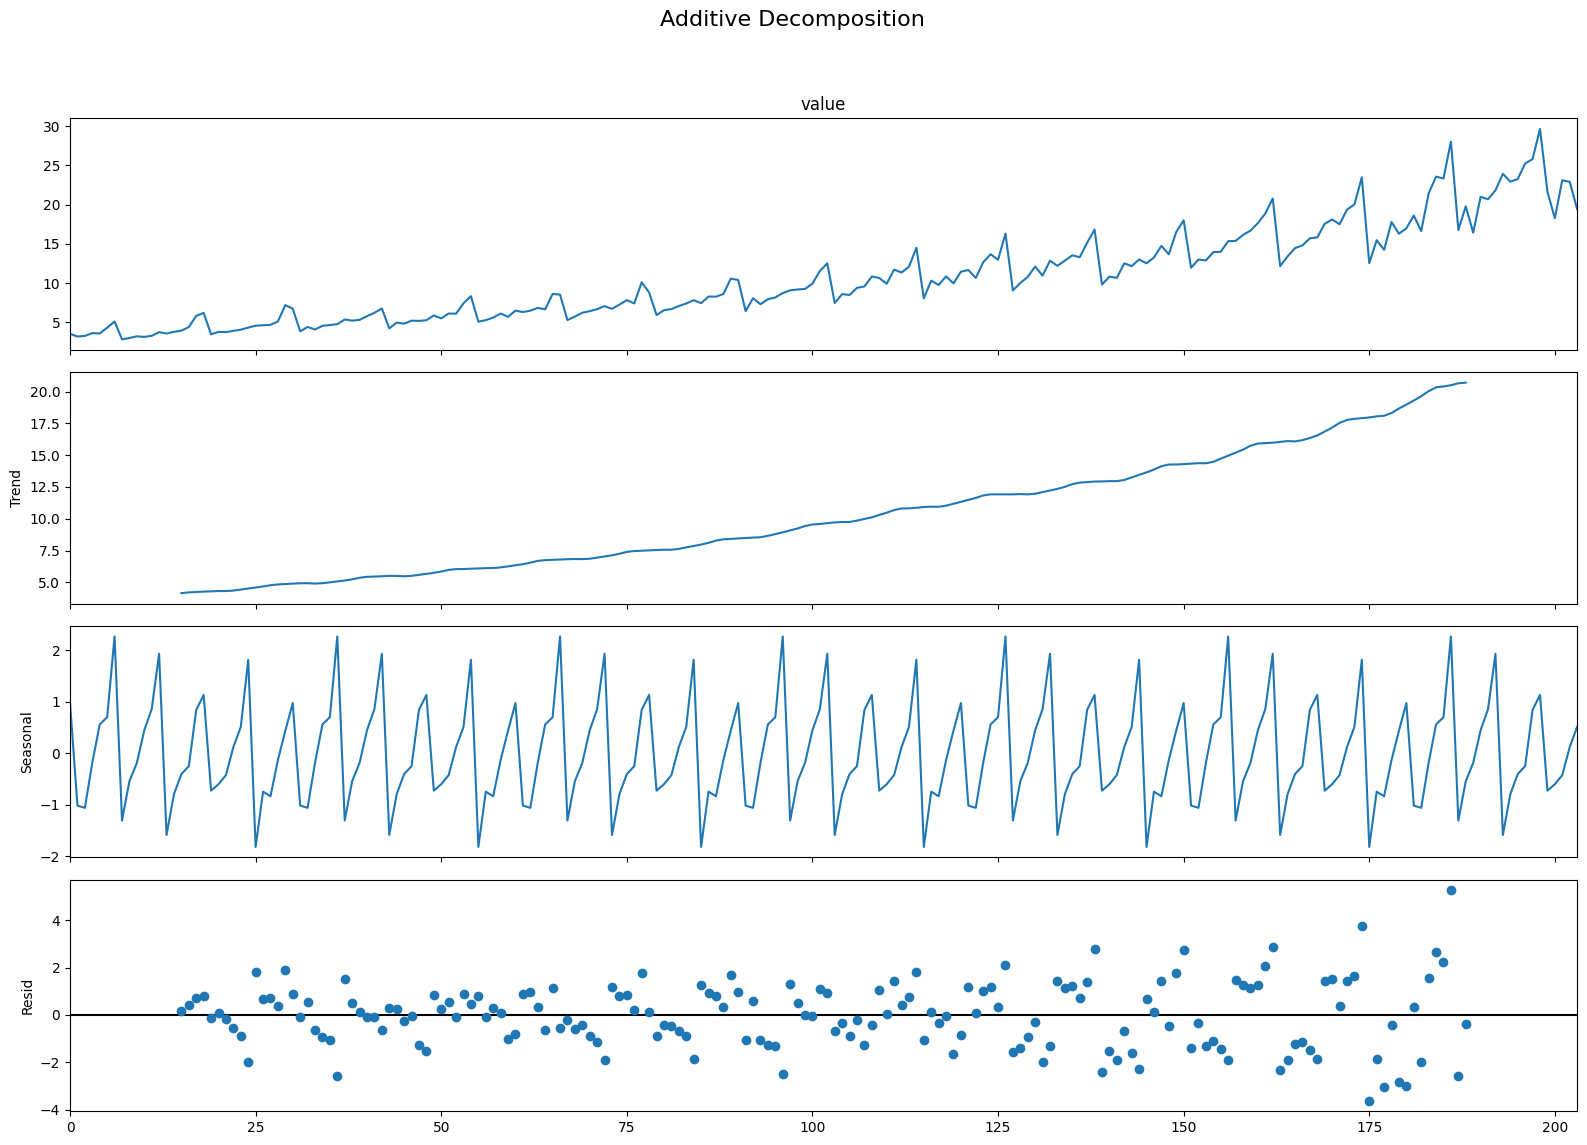

In [ ]:
# @title
# Punto 2 Descomposici√≥n
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(bd['value'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(bd['value'], model='additive', period=30)

# GRAFICACI√ìN
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

plt.show()


De acuerdo a la descoposici√≥n autom√°tica podemos concluir que el valor general de la serie aumenta con el tiempo. Ademas de que hay un patr√≥n c√≠clico repetitivo en los datos de aproximadamento cada 30 meses. Por lo que podemos concluir que la serie presenta estacionalidad.

Diferencias

Para trabajar la no estacionaridad en medio se propone una transformaci√≥n logaritmica seguida de una transformaci√≥n diferencial.

In [ ]:
# @title
# Aplicar el logaritmo natural a la columna con la primera diferencia
bd['log_value'] = np.log(bd['value'])

# Calcular la primera diferencia de la columna 'value'
bd['diferencia_log_value'] = bd['log_value'].diff()

bd

date      value  log_value  diferencia_log_value
0    1991-07-01   3.526591   1.260332                   NaN
1    1991-08-01   3.180891   1.157161             -0.103170
2    1991-09-01   3.252221   1.179338              0.022177
3    1991-10-01   3.611003   1.283986              0.104647
4    1991-11-01   3.565869   1.271408             -0.012578
..          ...        ...        ...                   ...
199  2008-02-01  21.654285   3.075203             -0.314777
200  2008-03-01  18.264945   2.904984             -0.170220
201  2008-04-01  23.107677   3.140165              0.235181
202  2008-05-01  22.912510   3.131683             -0.008482
203  2008-06-01  19.431740   2.966908             -0.164775

[204 rows x 4 columns]

Nuevo analisis exploratorio.

Text(0.5, 1.0, 'Hist√≥rico')

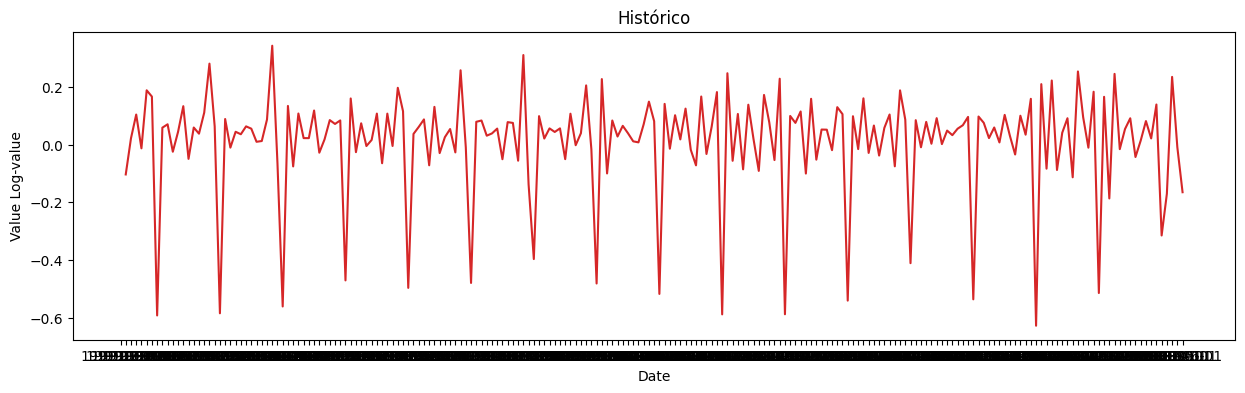

In [ ]:
# @title
plt.figure (figsize=(15,4), dpi=100)
plt.plot(bd['date'],bd['diferencia_log_value'], color='tab:red' )
plt.xlabel('Date')
plt.ylabel('Value Log-value')
plt.title('Hist√≥rico')

Podemos ver del analisis exploratorio de datos que ya tenemos estacionaridad en media y varianza. Dado que la serie presenta tanto tendencia como estacionalidad, proponemos un modelo ARIMA ser√≠a una buena opci√≥n. Este modelo puede capturar tanto la componente autoregresiva como la estacionalidad de la serie.

Corroborando con la ACF y PACF

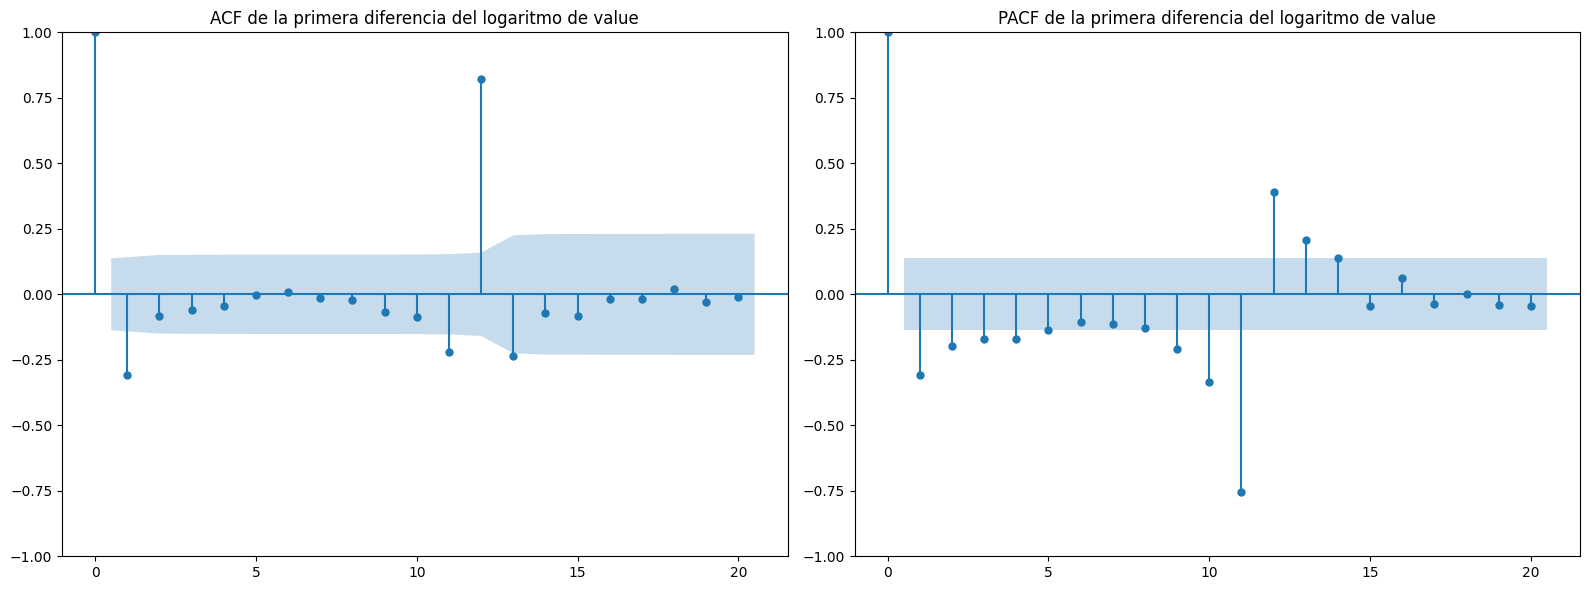

In [ ]:
# @title
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Aseg√∫rate de que no haya valores NaN en la columna antes de graficar
serie = bd['diferencia_log_value'].dropna()

# Crear subplots para ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gr√°fico de la ACF
plot_acf(serie, lags=20, ax=axes[0])
axes[0].set_title('ACF de la primera diferencia del logaritmo de value')

# Gr√°fico de la PACF
plot_pacf(serie, lags=20, ax=axes[1])
axes[1].set_title('PACF de la primera diferencia del logaritmo de value')

# Mostrar las gr√°ficas
plt.tight_layout()
plt.show()

Se corrobora por la metodologia ACF y PACF que la serie se logro tranformar en una seria estacionaria (media y varianza).

Estimaci√≥n

$ARIMA(p_{PACF},d, q_{ACF}) = ARIMA (1,1,1)$


En la gr√°fica de la ACF, el primer rezago es muy significativo y luego decrece r√°pidamente. Dado que el primer pico significativo est√° en el rezago 1, vamos a considerar $q=1$ como punto de partida.

En la gr√°fica de la PACF, el primer rezago es muy significativo, y luego hay varios rezagos adicionales que tambi√©n son significativos (alrededor de 3 o 4).La disminuci√≥n de la PACF despu√©s del primer rezago indica que un p peque√±o, como $p=1$ o $p=2$, podr√≠a ser adecuado.

Vamos a probar un modelo $ARIMA(1,1,1)$, $ARIMA(1,1,0)$, $ARIMA(0,1,1)$, $ARIMA(2,1,1)$ y ver cu√°l se ajusta mejor a los datos.

Modelo 1.-

$ARIMA(1,1,1)$

In [ ]:
# @title
#from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

modelo = ARIMA(bd['diferencia_log_value'], order = (1, 0, 1))
mod_salida = modelo.fit()
mod_salida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     diferencia_log_value   No. Observations:                  204
Model:                   ARIMA(1, 0, 1)   Log Likelihood                  99.141
Date:                  Sun, 01 Sep 2024   AIC                           -190.281
Time:                          23:52:19   BIC                           -177.009
Sample:                               0   HQIC                          -184.912
                                  - 204                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.000     29.274      0.000       0.009       0.010
ar.L1          0.3081      0.062      4.954      0.000       0.186       0.430
ma.L1         -0.9999      2.761     -0.362      0.717      -6.411       4.411
sigma2         0.0215      0.059      0.363      0.717      -0.095       0.138
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                14.17
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.42
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Modelo 2.-

$ARIMA(1,1,0)$

In [ ]:
# @title
#from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

modelo = ARIMA(bd['diferencia_log_value'], order = (1, 0, 0))
mod_salida = modelo.fit()
mod_salida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     diferencia_log_value   No. Observations:                  204
Model:                   ARIMA(1, 0, 0)   Log Likelihood                  68.408
Date:                  Sun, 01 Sep 2024   AIC                           -130.817
Time:                          23:52:35   BIC                           -120.862
Sample:                               0   HQIC                          -126.790
                                  - 204                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.015      0.576      0.565      -0.021       0.038
ar.L1         -0.3079      0.098     -3.128      0.002      -0.501      -0.115
sigma2         0.0298      0.003     10.016      0.000       0.024       0.036
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):               246.79
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -1.91
Prob(H) (two-sided):                  0.47   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Modelo 3.-

$ARIMA(0,1,1)$

In [ ]:
# @title
#from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

modelo = ARIMA(bd['diferencia_log_value'], order = (0, 0, 1))
mod_salida = modelo.fit()
mod_salida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     diferencia_log_value   No. Observations:                  204
Model:                   ARIMA(0, 0, 1)   Log Likelihood                  89.119
Date:                  Sun, 01 Sep 2024   AIC                           -172.238
Time:                          23:52:57   BIC                           -162.283
Sample:                               0   HQIC                          -168.211
                                  - 204                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.000     45.971      0.000       0.009       0.010
ma.L1         -0.9999      3.401     -0.294      0.769      -7.665       5.665
sigma2         0.0237      0.080      0.295      0.768      -0.134       0.181
===================================================================================
Ljung-Box (L1) (Q):                  18.66   Jarque-Bera (JB):                 5.91
Prob(Q):                              0.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.87   Skew:                             0.41
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Modelo 4.-

$ARIMA(2,1,1)$

In [ ]:
# @title
#from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

modelo = ARIMA(bd['diferencia_log_value'], order = (2, 0, 1))
mod_salida = modelo.fit()
mod_salida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     diferencia_log_value   No. Observations:                  204
Model:                   ARIMA(2, 0, 1)   Log Likelihood                  99.454
Date:                  Sun, 01 Sep 2024   AIC                           -188.908
Time:                          23:53:14   BIC                           -172.317
Sample:                               0   HQIC                          -182.197
                                  - 204                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.000     31.455      0.000       0.009       0.010
ar.L1          0.3246      0.081      3.998      0.000       0.165       0.484
ar.L2         -0.0564      0.095     -0.595      0.552      -0.242       0.129
ma.L1         -0.9993      0.430     -2.321      0.020      -1.843      -0.156
sigma2         0.0215      0.009      2.321      0.020       0.003       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                11.31
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.36
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

De los modelos anteriores podemos concluir que el que tiene mejor ajuste es el Modelo 1. Con una  AIC= -190.281 y BIC= -177.009. De este modelo tambien podemos concluir:

El coeficiente de la constante es cercano a cero y estad√≠sticamente significativo. Esto indica que hay un peque√±o crecimiento promedio en la serie despu√©s de la diferenciaci√≥n y la transformaci√≥n logar√≠tmica. El coeficiente AR(1) es positivo y estad√≠sticamente significativo. Esto significa que el valor actual de la serie est√° relacionado positivamente con el valor anterior, despu√©s de considerar el efecto de la diferenciaci√≥n. El coeficiente MA(1) est√° cerca de -1 y no es estad√≠sticamente significativo. Esto sugiere que el efecto de los shocks aleatorios en el per√≠odo anterior es casi completamente eliminado en el per√≠odo actual.

Test de Ljung-Box: El valor p del test de Ljung-Box es alto (0.85), lo cual indica que los residuos del modelo no muestran autocorrelaci√≥n significativa. Esto es una buena se√±al, ya que sugiere que el modelo captura bien la estructura de autocorrelaci√≥n de la serie.
Test de Jarque-Bera: El valor p del test de Jarque-Bera es bajo (0.00), lo cual indica que los residuos no siguen una distribuci√≥n normal. Esto podr√≠a ser un problema, ya que muchos de los tests estad√≠sticos utilizados en el an√°lisis de series de tiempo asumen normalidad.
Heteroscedasticidad: El test de heteroscedasticidad no rechaza la hip√≥tesis nula de homoscedasticidad (varianza constante), lo cual es un resultado positivo.



Pronostico.

In [ ]:
# @title
modelo = ARIMA(bd['diferencia_log_value'], order = (1, 0, 1))
mod_salida = modelo.fit()

predictions = mod_salida.get_forecast(len(bd['diferencia_log_value']))
predictions_df = predictions.conf_int(alpha = 0.05)
predictions_df["Predictions"] = mod_salida.predict(start =
predictions_df.index[0], end = predictions_df.index[-1])
predictions_df.index = bd['diferencia_log_value']
predictions_arma = predictions_df["Predictions"]
predictions_arma
#print(predictions_arma.values[::])
print(predictions_arma.values [0:14] )

[0.14087219 0.04983962 0.02179293 0.01315188 0.01048962 0.00966939
 0.00941668 0.00933882 0.00931483 0.00930744 0.00930516 0.00930446
 0.00930424 0.00930418]


Conclusi√≥n.-

Modelo propuesto: $Z‚Çú = 0.0093 + 0.3081 * Z‚Çú‚Çã‚ÇÅ + a‚Çú - 0.9999 * a‚Çú‚Çã‚ÇÅ$

Aunque el test de Jarque-Bera indica que los residuos del modelo ARIMA(1,1,1) no siguen una distribuci√≥n normal, el modelo captura de manera efectiva la tendencia y la estacionalidad de la serie. Los pron√≥sticos obtenidos son coherentes con el comportamiento hist√≥rico y los intervalos de confianza proporcionan una medida razonable de la incertidumbre. Adem√°s, al comparar con otros modelos, el ARIMA(1,1,1) mostr√≥ un mejor ajuste seg√∫n el criterio de AIC. Por lo tanto, a pesar de la no normalidad, considero que este modelo es adecuado para realizar pron√≥sticos a corto plazo.

En resumen, el modelo sugiere que existe una tendencia al alza en la serie (constante positiva).
Los valores pasados tienen un impacto positivo en los valores futuros, aunque no es extremadamente fuerte.
Los errores pasados no parecen tener una influencia significativa en los valores futuros.